# Project Name - Health Insurance Cross Sell Prediction

# Project Type - Classification
# Contribution - Individual

# GitHub Link
https://github.com/tusharraskar/ML_Classification.git

# Problem Statement

### Business Problem Overview

An insurance company is looking to build a model to predict whether their past health insurance policyholders would also be interested in purchasing vehicle insurance from the company. 

An insurance policy is a contract where the company agrees to provide compensation for specific losses, injuries, or death in exchange for regular payments called premiums. 

In this case, the company wants to use information about the customer's demographics, vehicle details, and previous insurance policy information to predict their interest in vehicle insurance. 

This information would be used to target marketing efforts and optimize the company's revenue.

### Business Objective

The business objective for a health insurance cross-sell prediction is to identify potential customers who are likely to purchase additional products. 

This allows the insurance company to target their marketing efforts towards these individuals, potentially increasing sales and revenue. 

Additionally, by identifying and targeting high-risk customers, the insurance company can also improve their risk management and profitability.

In [352]:
# Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math 
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score,confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [353]:
# Dataset Loading
data = pd.read_csv('TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [354]:
# Viewing data's first 5 row

data.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [355]:
# Chicking shape of data

data.shape

(381109, 12)

#### Data has 381109 rows and 12 columns.

### Variables Description 

id          : Unique ID for customer

Gender        : Male/Female

Age         : Age of customer

Driving License   : Customer has DL or not

Region_Code       : Unique code for the region of the customer

Previously_insured         : Customer already has vehicle insurance or not

Vehicle_age       : Age of the vehicle

Vehicle_damage     : Past damages present or not

Annual_premium      : The amount customer needs to pay as premium

PolicySalesChannel      : Anonymized Code for the channel of outreaching to the customer ie.
                          Different Agents, Over Mail, Over Phone, In Person, etc
                          
Vintage           : Number of Days, Customer has been associated with the company  

Response      : Customer is interested or not       

In [356]:
# Checking data types

data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Ckechking null or missing values

In [357]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### In our data there no null or missing values

## Checking unique values in each feature

In [358]:
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## Data Describe

In [359]:
data.describe() 

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [360]:
# Creating copy of the current data and assigning to df
df=data.copy()

In [361]:
# Creating interested Response dataset
df_Response=df[(df['Response']==1)]

In [362]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

## Exploring Response Labels - Univariate analysis

Text(0.5, 1.0, 'Pie Chart For Response')

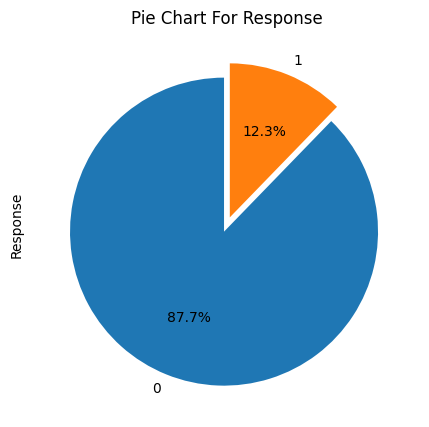

In [363]:
df['Response'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Response')

##### 1. Why did you pick the specific chart?

Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

##### 2. What is/are the insight(s) found from the chart?

Our data is imblance

Any data with unequal class distribution is technically imblance.

In our data 87.7% data not interested Response and remaining 12.3%  interested. 

##### 3. Will the gained insights help creating a positive business impact? 

In your case, with 87.7% of the data being "not interested" in purchasing vehicle insurance, and only 12.3% being "interested", the model may not be able to accurately predict the "interested" class. This could lead to a high number of false negatives (predicting "not interested" when the customer is actually "interested") and a low number of true positives (predicting "interested" when the customer is actually "interested").

If the data is highly imbalanced, with a large majority of the data belonging to one class, it can be difficult for a model to accurately predict the minority class. This is because the model will likely be trained to predict the majority class more often, resulting in a higher accuracy overall but a lower accuracy for the minority class.

## Exploring Gender feature - Univariate and Bivariate analysis

In [364]:
# Number of Unique gender

df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Text(0.5, 1.0, 'Pie Chart For Gender')

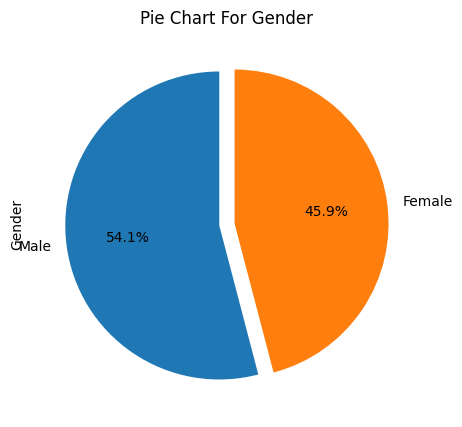

In [365]:
df['Gender'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Gender')

##### 1. Why did you pick the specific chart?

Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

##### 2. What is/are the insight(s) found from the chart?

In our data 54.1% Male and 45.9%  Female. 


In [366]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(8,5))
# total = float(len(df))
# ax = sns.countplot(x="Gender", hue="Response", data=df)
# plt.title('Data provided for each event', fontsize=20)
# for p in ax.patches:
#     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#     x = p.get_x() + p.get_width()
#     y = p.get_height()
#     ax.annotate(percentage, (x, y),ha='center')
# plt.show()

In [367]:
# creating df_genderwise_Response_count%

gender=df['Gender'].unique()
interested_response=[df[(df['Gender']==gen)]['Response'].value_counts()[1] for gen in gender]
not_interested_response=[df[(df['Gender']==gen)]['Response'].value_counts()[0] for gen in gender]

df_genderwise_Response_count=pd.DataFrame({'Gender' : gender,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})
df_genderwise_Response_count
df_genderwise_Response_count['interested_response %']= round(((df_genderwise_Response_count['interested_response'])/
                                                 ((df_genderwise_Response_count['interested_response'])+ 
                                                         (df_genderwise_Response_count['not_interested_response'])))*100,2)
df_genderwise_Response_count['not_interested_response %']= round(((df_genderwise_Response_count['not_interested_response'])/
                                                  ((df_genderwise_Response_count['interested_response'])+ 
                                                         (df_genderwise_Response_count['not_interested_response'])))*100,2)
df_genderwise_Response_count

Gender  interested_response  not_interested_response  \
0    Male                28525                   177564   
1  Female                18185                   156835   

   interested_response %  not_interested_response %  
0                  13.84                      86.16  
1                  10.39                      89.61

Text(0.5, 1.0, 'Response count gender wise')

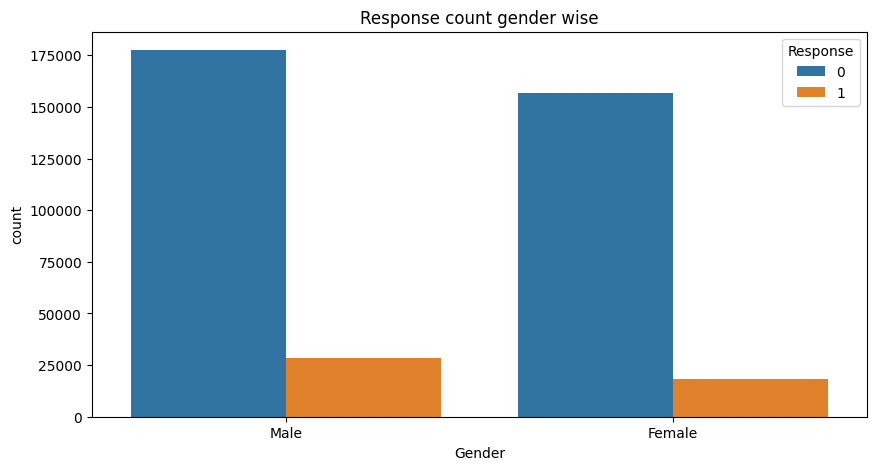

In [368]:
# Ploting Response count gender wise

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df['Gender'],hue='Response',data=df)
plt.title('Response count gender wise')

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

There are two gender

interested response of males are 13.84% 

interested response of females are 10.39% 

##### 3. Will the gained insights help creating a positive business impact?   

Yes, The insight that the interested response rate for males is higher (13.84%) than for females (10.39%) could be used to inform the company's marketing efforts.

## Exploring Age feature - Univariate and Bivariate analysis

In [369]:
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [370]:
# Creating df of age with respect to interested_response and not_interested_response

Age_interested_response=df[(df['Response']==1)]
Age_not_interested_response=df[(df['Response']==0)]

In [371]:
# Mean 

print('Mean of Age of all data',df['Age'].mean())
print('Mean of Age of interested response',Age_interested_response['Age'].mean())
print('Mean of Age of not interested response',Age_not_interested_response['Age'].mean())

Mean of Age of all data 38.822583565331705
Mean of Age of interested response 43.435559837293944
Mean of Age of not interested response 38.17822720761725


In [372]:
# Median 

print('Median of Age of all data',df['Age'].median())
print('Median of Age of interested response',Age_interested_response['Age'].median())
print('Median of Age of not interested response',Age_not_interested_response['Age'].median())

Median of Age of all data 36.0
Median of Age of interested response 43.0
Median of Age of not interested response 34.0


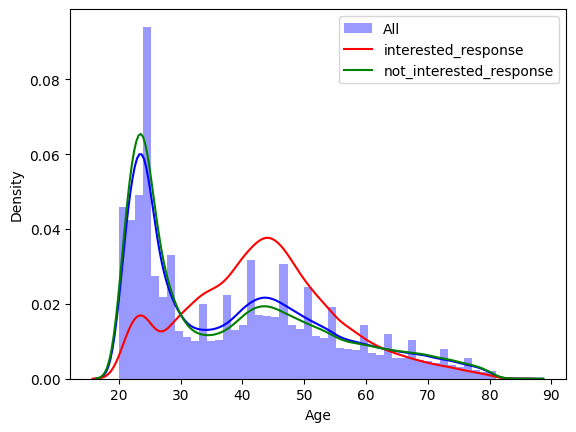

In [373]:
sns.distplot(df['Age'], color='blue' , label='All') 
sns.distplot(Age_interested_response['Age'],color='red' , label='interested_response',hist=False)
sns.distplot(Age_not_interested_response['Age'],color='green' , label='not_interested_response',hist=False) 
plt.legend()

##### 1. Why did you pick the specific chart?

The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

##### 2. What is/are the insight(s) found from the chart?
It appears that the mean and median age of customers who are "interested" in purchasing vehicle insurance is higher than the mean and median age of customers who are "not interested" in purchasing vehicle insurance.

The mean age of all customers is 38.82, while the mean age of "interested" customers is 43.44, and the mean age of "not interested" customers is 38.18. Similarly, the median age of all customers is 36.0, while the median age of "interested" customers is 43.0, and the median age of "not interested" customers is 34.0.

##### 3. Will the gained insights help creating a positive business impact?  
The insights gained from the mean and median age of all data, as well as the mean and median age of the "interested" and "not interested" responses can potentially help create a positive business impact for the insurance company.

From the chart, it appears that the mean and median age of customers who are "interested" in purchasing vehicle insurance is higher than those who are "not interested." This suggests that older customers may be more likely to be interested in purchasing additional insurance policies from the company.

The company can use this information to target their marketing efforts towards older customers, as they may be more likely to respond positively to offers for vehicle insurance. 

Additionally, the company may also want to consider offering discounts or promotions to older customers in order to incentivize them to purchase additional policies.

<Figure size 1000x800 with 0 Axes>

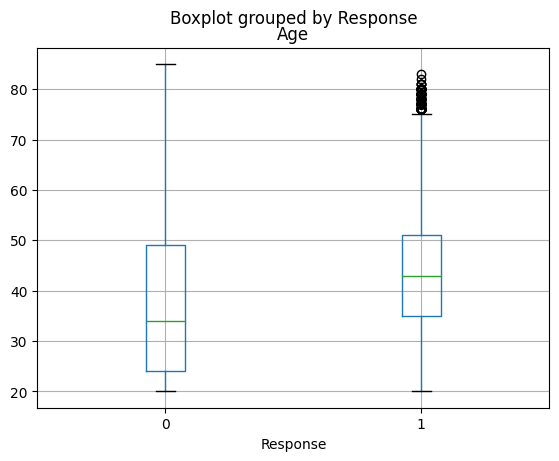

In [374]:
#Analysing by using boxplot diagram between 'Age' and 'response'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='Age', by='Response')
fig.suptitle('Age', fontsize=14, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

boxplots are useful for identifying patterns and outliers in the data. For example, if a boxplot shows a large number of outliers, it could indicate an issue with the data collection or a potential problem with the data. Additionally, boxplots can be used to compare the distribution of different datasets, or to compare the distribution of a single dataset across different groups or categories.

##### 2. What is/are the insight(s) found from the chart?

the age have some outliers in upper side of interested response

##### 3. Will the gained insights help creating a positive business impact?
The insight that age has some outliers in the upper side of the "interested" response in a Health Insurance Cross Sell Prediction, could potentially be useful in creating a positive business impact.

It suggests that older customers may be more likely to be interested in purchasing vehicle insurance from the company. This information can be used to target marketing efforts to older age groups, or to tailor the sales pitch to better appeal to older customers.

## Exploring Driving_License feature - Univariate and Bivariate analysis


In [375]:
# cheking unique values

df['Driving_License'].unique()

array([1, 0], dtype=int64)

In [376]:
# checking value count
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

Text(0.5, 1.0, 'Pie Chart For Driving_License')

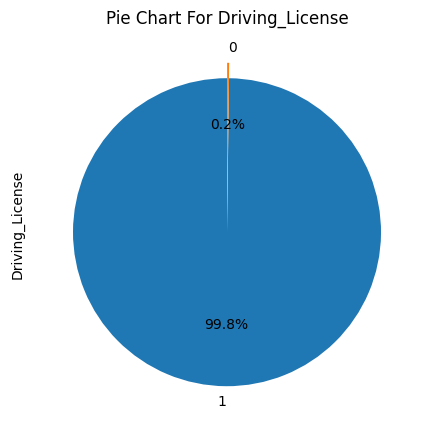

In [377]:
# Ploting value counts

df['Driving_License'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Driving_License')

##### 1. Why did you pick the specific chart?

Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

##### 2. What is/are the insight(s) found from the chart?

Only 0.2% customer did not have Driving License.

In [378]:
# creating df Driving_License interested Response count%

D_L=df['Driving_License'].unique()
interested_response=[df[(df['Driving_License']==gen)]['Response'].value_counts()[1] for gen in D_L]
not_interested_response=[df[(df['Driving_License']==gen)]['Response'].value_counts()[0] for gen in D_L]

df_D_Lrwise_Response_count=pd.DataFrame({'Driving_License' : D_L,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_D_Lrwise_Response_count['interested_response %']= round(((df_D_Lrwise_Response_count['interested_response'])/
                                                 ((df_D_Lrwise_Response_count['interested_response'])+ 
                                                         (df_D_Lrwise_Response_count['not_interested_response'])))*100,2)
df_D_Lrwise_Response_count['not_interested_response %']= round(((df_D_Lrwise_Response_count['not_interested_response'])/
                                                  ((df_D_Lrwise_Response_count['interested_response'])+ 
                                                         (df_D_Lrwise_Response_count['not_interested_response'])))*100,2)
df_D_Lrwise_Response_count

Driving_License  interested_response  not_interested_response  \
0                1                46669                   333628   
1                0                   41                      771   

   interested_response %  not_interested_response %  
0                  12.27                      87.73  
1                   5.05                      94.95

Text(0.5, 1.0, 'Response count Driving License wise')

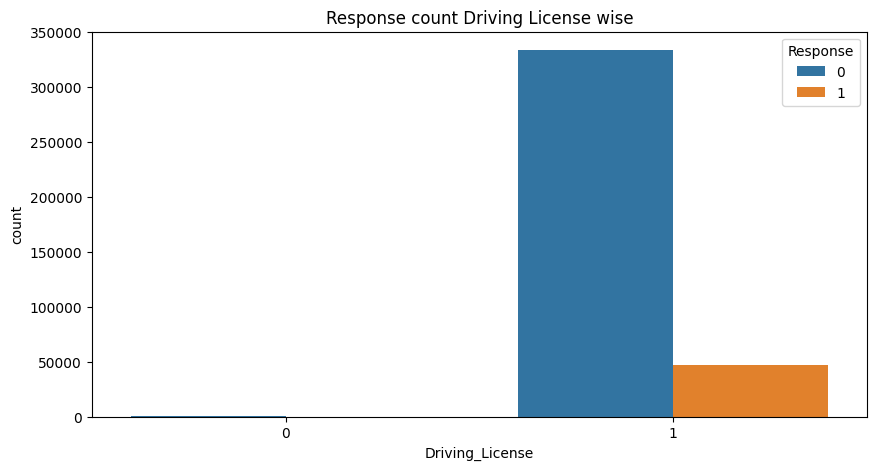

In [379]:
# Ploting Response count Driving_License wise

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df['Driving_License'],hue='Response',data=df)
plt.title('Response count Driving License wise')

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

A large percentage of customers with a driving license (12.27%) have shown interest in purchasing health insurance.

A relatively small percentage of customers without a driving license (5.05%) have shown interest in purchasing health insurance.

Having a driving license may be a strong indicator of a customer's likelihood to purchase health insurance.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights can help create a positive business impact. By identifying that a large percentage of customers with a driving license have shown interest in purchasing health insurance, the company can focus their marketing and sales efforts on targeting customers who have a driving license. 

This can potentially increase the number of customers interested in purchasing health insurance, resulting in increased revenue for the company. 

Additionally, the company can also use this information to develop targeted campaigns and offers for customers who do not have a driving license, in order to increase the percentage of customers without a driving license showing interest in purchasing health insurance.

## Exploring Region Code feature - Univariate and Bivariate analysis

In [380]:
# cheking unique values
df['Region_Code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [381]:
# cheking unique values
df['Region_Code'].nunique()

53

In [382]:
# checking value count
df['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [383]:
# creating df Region_Code interested Response count%

Region_Code=(df['Region_Code'].unique()).astype('int')
interested_response=[df[(df['Region_Code']==code)]['Response'].value_counts()[1] for code in Region_Code]
not_interested_response=[df[(df['Region_Code']==code)]['Response'].value_counts()[0] for code in Region_Code]

df_Region_Codewise_Response_count=pd.DataFrame({'Region_Code' : Region_Code,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_Region_Codewise_Response_count['interested_response %']= round(((df_Region_Codewise_Response_count['interested_response'])/
                                                 ((df_Region_Codewise_Response_count['interested_response'])+ 
                                                         (df_Region_Codewise_Response_count['not_interested_response'])))*100,2)
df_Region_Codewise_Response_count['not_interested_response %']= round(((df_Region_Codewise_Response_count['not_interested_response'])/
                                                  ((df_Region_Codewise_Response_count['interested_response'])+ 
                                                         (df_Region_Codewise_Response_count['not_interested_response'])))*100,2)
df_Region_Codewise_Response_count

Region_Code  interested_response  not_interested_response  \
0            28                19917                    86498   
1             3                 1181                     8070   
2            11                 1041                     8191   
3            41                 2224                    16039   
4            33                  760                     6894   
5             6                  439                     5841   
6            35                  865                     6077   
7            50                  642                     9601   
8            15                  958                    12350   
9            45                  615                     4990   
10            8                 3257                    30620   
11           36                  703                     8094   
12           30                  900                    11291   
13           26                  187                     2400   
14           16                  134                     1873   
15           47                  652                     6784   
16           48                  477                     4204   
17           19                  250                     1285   
18           39                  574                     4070   
19           23                  300                     1660   
20           37                  436                     5065   
21            5                  148                     1131   
22           17                  184                     2433   
23            2                  287                     3751   
24            7                  432                     2847   
25           29                 1365                     9700   
26           46                 2032                    17717   
27           27                  209                     2614   
28           25                  107                     2396   
29           13                  364                     3672   
30           18                  678                     4475   
31           20                  223                     1712   
32           49                  137                     1695   
33           22                   83                     1226   
34           44                   33                      775   
35            0                  174                     1847   
36            9                  253                     2848   
37           31                  197                     1763   
38           12                  312                     2886   
39           34                  126                     1538   
40           21                  303                     3963   
41           10                  263                     4111   
42           14                  422                     4256   
43           38                  389                     1637   
44           24                  342                     2073   
45           40                  153                     1142   
46           43                  244                     2395   
47           32                  239                     2548   
48            4                  285                     1516   
49           51                   28                      155   
50           42                   44                      547   
51            1                  109                      899   
52           52                   33                      234   

    interested_response %  not_interested_response %  
0                   18.72                      81.28  
1                   12.77                      87.23  
2                   11.28                      88.72  
3                   12.18                      87.82  
4                    9.93                      90.07  
5                    6.99                      93.01  
6                   12.46                      87.54  
7                    6.27                      93.73 

In [384]:
df_Region_Codewise_Response_count.sort_values(by=['interested_response %'],ascending= False)

Region_Code  interested_response  not_interested_response  \
43           38                  389                     1637   
0            28                19917                    86498   
17           19                  250                     1285   
48            4                  285                     1516   
19           23                  300                     1660   
49           51                   28                      155   
44           24                  342                     2073   
24            7                  432                     2847   
30           18                  678                     4475   
1             3                 1181                     8070   
6            35                  865                     6077   
18           39                  574                     4070   
52           52                   33                      234   
25           29                 1365                     9700   
3            41                 2224                    16039   
45           40                  153                     1142   
21            5                  148                     1131   
31           20                  223                     1712   
2            11                 1041                     8191   
9            45                  615                     4990   
51            1                  109                      899   
26           46                 2032                    17717   
16           48                  477                     4204   
37           31                  197                     1763   
4            33                  760                     6894   
38           12                  312                     2886   
10            8                 3257                    30620   
46           43                  244                     2395   
42           14                  422                     4256   
29           13                  364                     3672   
15           47                  652                     6784   
35            0                  174                     1847   
47           32                  239                     2548   
36            9                  253                     2848   
11           36                  703                     8094   
20           37                  436                     5065   
39           34                  126                     1538   
32           49                  137                     1695   
50           42                   44                      547   
27           27                  209                     2614   
12           30                  900                    11291   
13           26                  187                     2400   
8            15                  958                    12350   
23            2                  287                     3751   
40           21                  303                     3963   
22           17                  184                     2433   
5             6                  439                     5841   
14           16                  134                     1873   
33           22                   83                     1226   
7            50                  642                     9601   
41           10                  263                     4111   
28           25                  107                     2396   
34           44                   33                      775   

    interested_response %  not_interested_response %  
43                  19.20                      80.80  
0                   18.72                      81.28  
17                  16.29                      83.71  
48                  15.82                      84.18  
19                  15.31                      84.69  
49                  15.30                      84.70  
44                  14.16                      85.84  
24                  13.17                      86.83 

In [385]:
#Filtering Region_Code which have interested_response % rate more than 10% 

df_Region_Codewise_Response_count_more_10=df_Region_Codewise_Response_count.sort_values(by=['interested_response %'],ascending=False)[(df_Region_Codewise_Response_count['interested_response %']>=10)]
df_Region_Codewise_Response_count_more_10

Region_Code  interested_response  not_interested_response  \
43           38                  389                     1637   
0            28                19917                    86498   
17           19                  250                     1285   
48            4                  285                     1516   
19           23                  300                     1660   
49           51                   28                      155   
44           24                  342                     2073   
24            7                  432                     2847   
30           18                  678                     4475   
1             3                 1181                     8070   
6            35                  865                     6077   
18           39                  574                     4070   
52           52                   33                      234   
25           29                 1365                     9700   
3            41                 2224                    16039   
45           40                  153                     1142   
21            5                  148                     1131   
31           20                  223                     1712   
2            11                 1041                     8191   
9            45                  615                     4990   
51            1                  109                      899   
26           46                 2032                    17717   
16           48                  477                     4204   
37           31                  197                     1763   

    interested_response %  not_interested_response %  
43                  19.20                      80.80  
0                   18.72                      81.28  
17                  16.29                      83.71  
48                  15.82                      84.18  
19                  15.31                      84.69  
49                  15.30                      84.70  
44                  14.16                      85.84  
24                  13.17                      86.83  
30                  13.16                      86.84  
1                   12.77                      87.23  
6                   12.46                      87.54  
18                  12.36                      87.64  
52                  12.36                      87.64  
25                  12.34                      87.66  
3                   12.18                      87.82  
45                  11.81                      88.19  
21                  11.57                      88.43  
31                  11.52                      88.48  
2                   11.28                      88.72  
9                   10.97                      89.03  
51                  10.81                      89.19  
26                  10.29                      89.71  
16                  10.19                      89.81  
37                  10.05                      89.95

Text(0, 0.5, 'interested_response %')

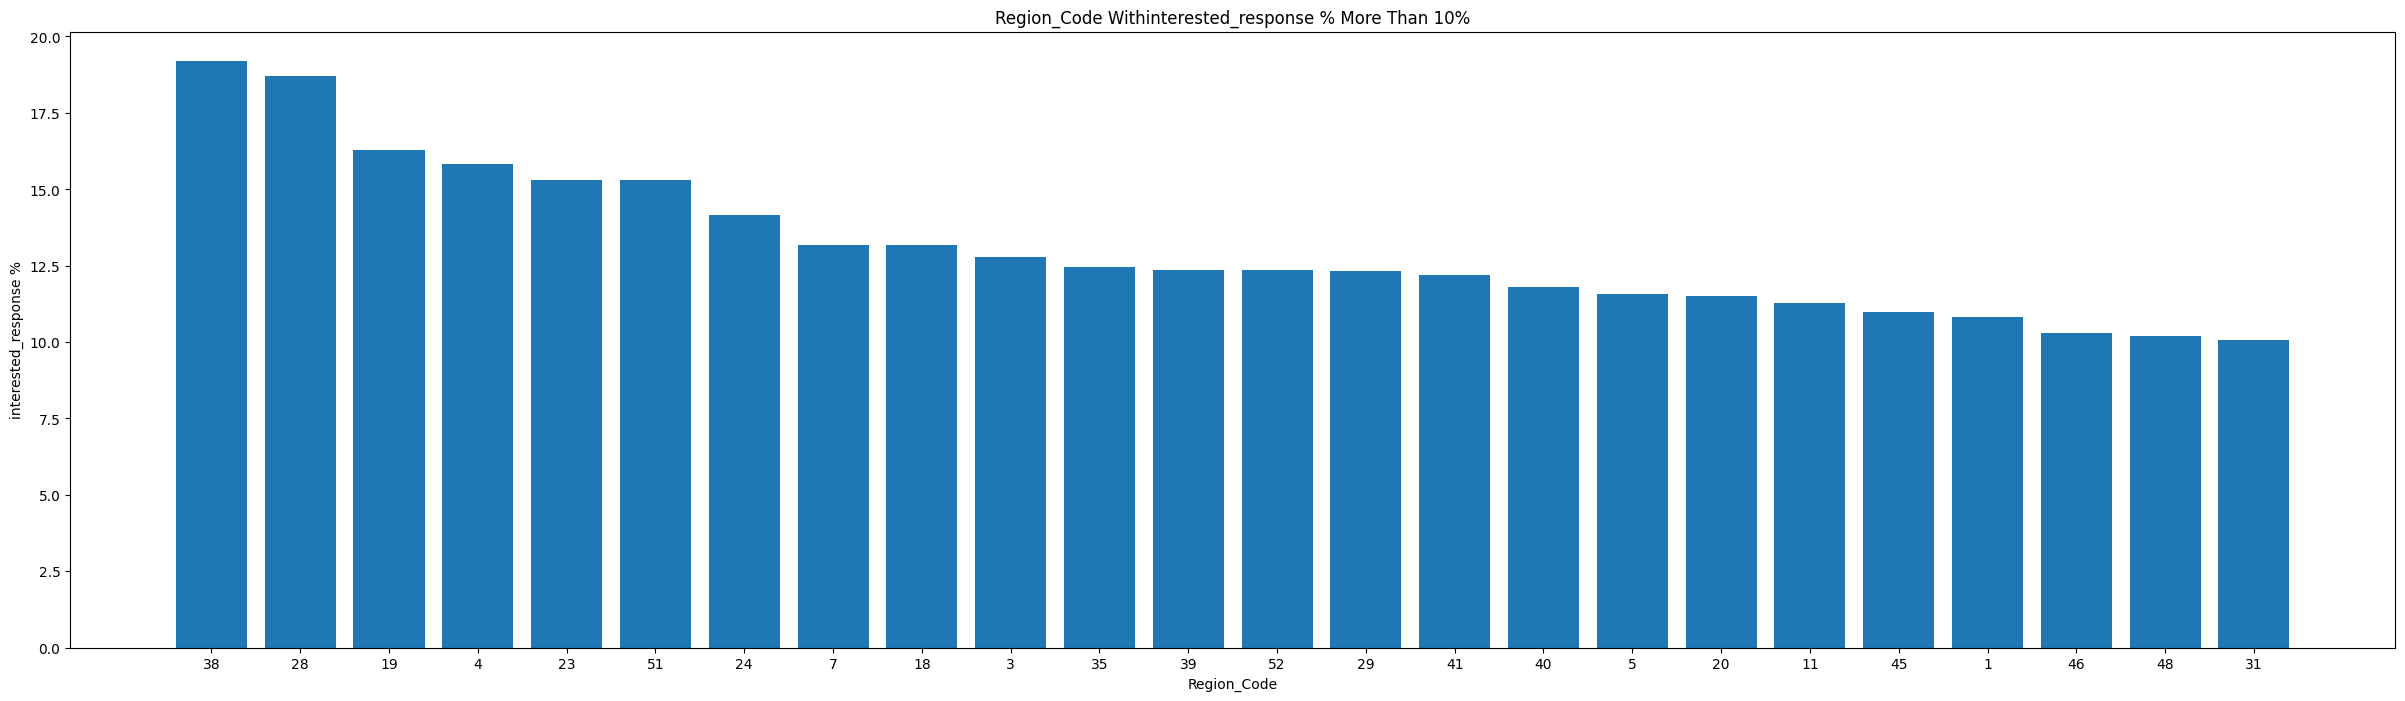

In [386]:
# bar plot of Region_Code which have interested_response % more than 10% 

plt.figure(figsize=(30,8))
plt.bar(df_Region_Codewise_Response_count_more_10['Region_Code'].astype('str'),
        df_Region_Codewise_Response_count_more_10['interested_response %'])
plt.title('Region_Code Withinterested_response % More Than 10%')
plt.xlabel('Region_Code')
plt.ylabel('interested_response %')

In [387]:
### Region_Code having interested_response % more than 10%

df_Region_Codewise_Response_count_more_10['Region_Code'].unique()

array([38, 28, 19,  4, 23, 51, 24,  7, 18,  3, 35, 39, 52, 29, 41, 40,  5,
       20, 11, 45,  1, 46, 48, 31])

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Region_Code '38' have high interested_response % of 19.20 %.

38, 28, 19,  4, 23, 51, 24,  7, 18,  3, 35, 39, 52, 29, 41, 40,  5,20, 11, 45,  1, 46, 48, 31, 33, 12,  8, 43, 14, 13, 47,  0, 32,  9,36, 37, 34, 49, 42, 27, 30, 26, 15,  2, 21, 17,  6, 16, 22, 50, 10, 25, and 44 have interested_response % more than 10%.

##### 3. Will the gained insights help creating a positive business impact? 

Yes, the gained insights can help create a positive business impact by identifying regions with high interested_response percentages, which can be targeted for cross-selling health insurance. By focusing on these regions, the company may be able to increase their sales and revenue. 

Additionally, by identifying regions with interested_response percentages above 10%, the company can also prioritize which regions to focus their marketing efforts on. 

In [388]:
#Filtering Region_Code which have interested_response % rate less than 10% 

df_Region_Codewise_Response_count_less_10=df_Region_Codewise_Response_count.sort_values(by=['interested_response %'])[(df_Region_Codewise_Response_count['interested_response %']<10)]
df_Region_Codewise_Response_count_less_10

Region_Code  interested_response  not_interested_response  \
34           44                   33                      775   
28           25                  107                     2396   
41           10                  263                     4111   
7            50                  642                     9601   
33           22                   83                     1226   
14           16                  134                     1873   
5             6                  439                     5841   
22           17                  184                     2433   
40           21                  303                     3963   
23            2                  287                     3751   
8            15                  958                    12350   
13           26                  187                     2400   
12           30                  900                    11291   
27           27                  209                     2614   
50           42                   44                      547   
32           49                  137                     1695   
39           34                  126                     1538   
20           37                  436                     5065   
11           36                  703                     8094   
36            9                  253                     2848   
47           32                  239                     2548   
35            0                  174                     1847   
15           47                  652                     6784   
29           13                  364                     3672   
42           14                  422                     4256   
46           43                  244                     2395   
10            8                 3257                    30620   
38           12                  312                     2886   
4            33                  760                     6894   

    interested_response %  not_interested_response %  
34                   4.08                      95.92  
28                   4.27                      95.73  
41                   6.01                      93.99  
7                    6.27                      93.73  
33                   6.34                      93.66  
14                   6.68                      93.32  
5                    6.99                      93.01  
22                   7.03                      92.97  
40                   7.10                      92.90  
23                   7.11                      92.89  
8                    7.20                      92.80  
13                   7.23                      92.77  
12                   7.38                      92.62  
27                   7.40                      92.60  
50                   7.45                      92.55  
32                   7.48                      92.52  
39                   7.57                      92.43  
20                   7.93                      92.07  
11                   7.99                      92.01  
36                   8.16                      91.84  
47                   8.58                      91.42  
35                   8.61                      91.39  
15                   8.77                      91.23  
29                   9.02                      90.98  
42                   9.02                      90.98  
46                   9.25                      90.75  
10                   9.61                      90.39  
38                   9.76                      90.24  
4                    9.93                      90.07

Text(0, 0.5, 'interested_response %')

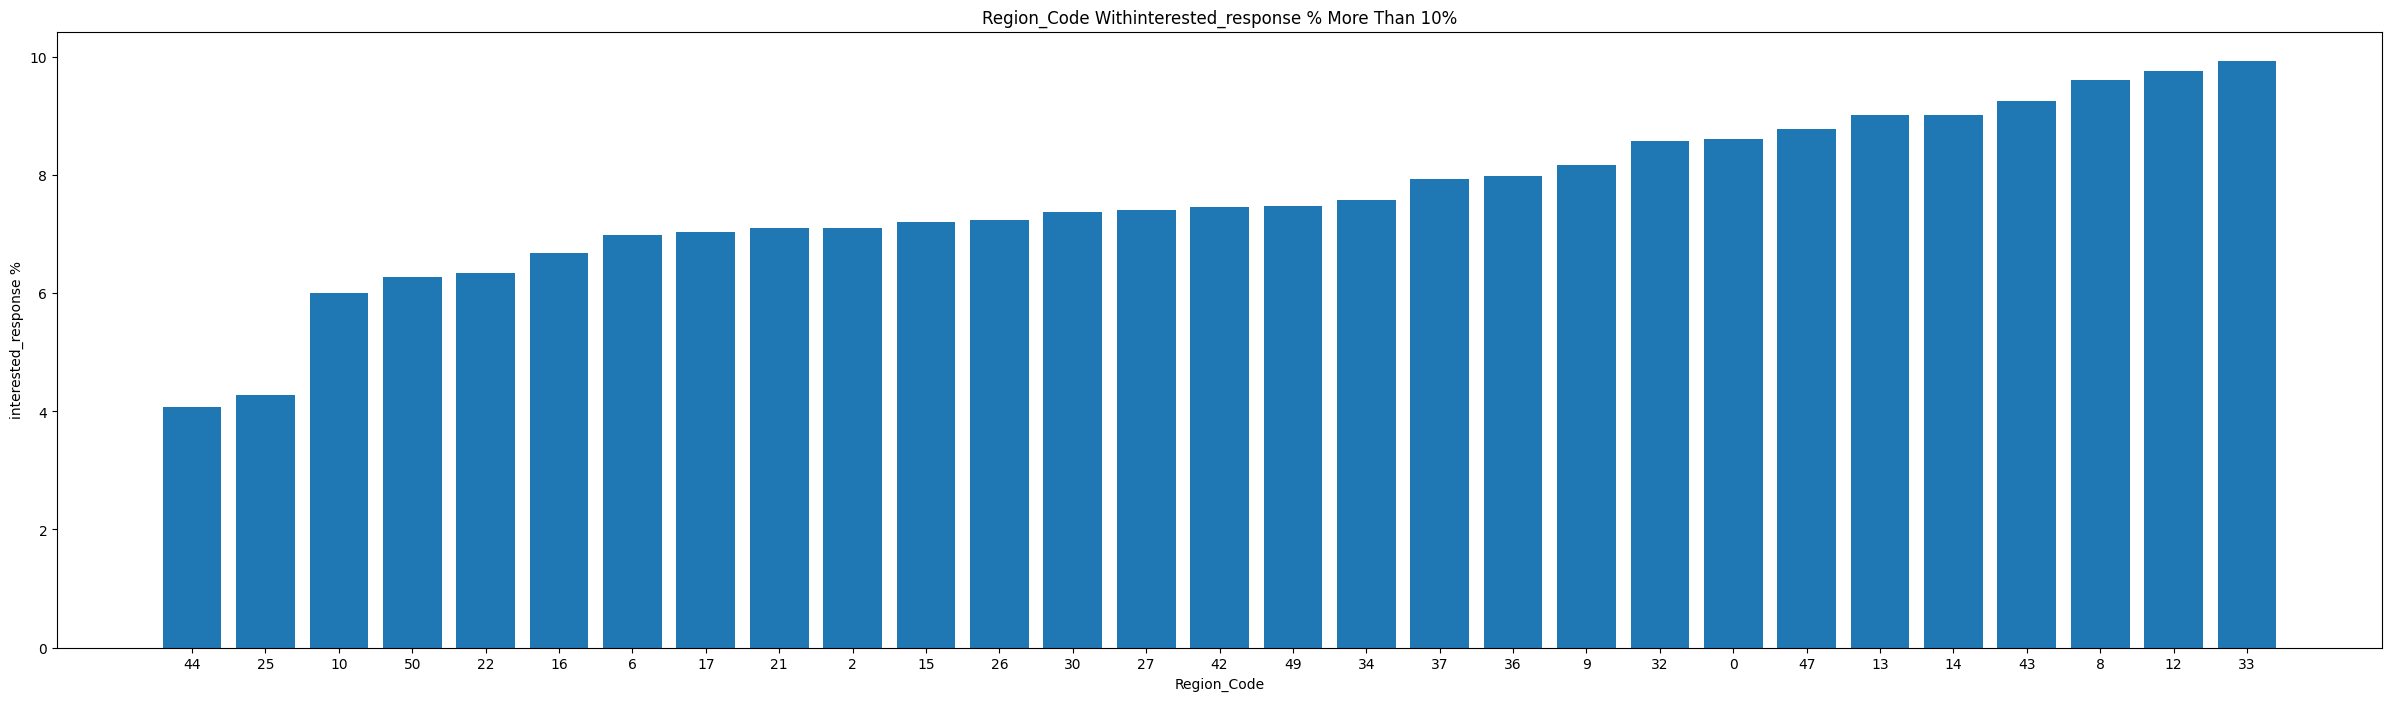

In [389]:
# bar plot of Region_Code which have interested_response % less than 10% 

plt.figure(figsize=(30,8))
plt.bar(df_Region_Codewise_Response_count_less_10['Region_Code'].astype('str'),
        df_Region_Codewise_Response_count_less_10['interested_response %'])
plt.title('Region_Code Withinterested_response % More Than 10%')
plt.xlabel('Region_Code')
plt.ylabel('interested_response %')

In [390]:
### Region_Code having interested_response % less than 10%

df_Region_Codewise_Response_count_less_10['Region_Code'].unique()

array([44, 25, 10, 50, 22, 16,  6, 17, 21,  2, 15, 26, 30, 27, 42, 49, 34,
       37, 36,  9, 32,  0, 47, 13, 14, 43,  8, 12, 33])

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Region_Code '44' have less interested_response % of 4.08 %.

Region_Code 44, 25, 10, 50, 22, 16,  6, 17, 21,  2, 15, 26, 30, 27, 42, 49, 34, 37, 36,  9, 32,  0, 47, 13, 14, 43,  8, 12, and 33 have interested_response % less than 10%.

##### 3. Will the gained insights help creating a positive business impact? 

Yes, the gained insights can help in creating a positive business impact by targeting the regions with higher interested_response % for cross-selling health insurance products.

By identifying the regions with low interested_response %, the company can focus on strategies to increase awareness and interest in these areas. This can lead to increased sales and revenue for the company.

## Exploring Previously_Insured feature - Univariate and Bivariate analysis

In [391]:
# cheking unique values
df['Previously_Insured'].unique()

array([0, 1], dtype=int64)

In [392]:
# checking value count
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

Text(0.5, 1.0, 'Pie Chart For Previously Insured')

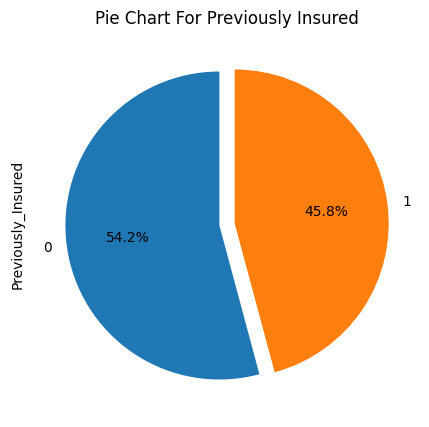

In [393]:
# Ploting value counts

df['Previously_Insured'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Previously Insured')

##### 1. Why did you pick the specific chart?

Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

##### 2. What is/are the insight(s) found from the chart?

45.8% Customer already has vehicle insurance

54.2% Customer did not has vehicle insurance


In [394]:
# creating df Previously_Insured interested Response count%

Previously_Insured=(df['Previously_Insured'].unique())
interested_response=[df[(df['Previously_Insured']==code)]['Response'].value_counts()[1] for code in Previously_Insured]
not_interested_response=[df[(df['Previously_Insured']==code)]['Response'].value_counts()[0] for code in Previously_Insured]

df_Previously_Insured_Response_count=pd.DataFrame({'Previously_Insured' : Previously_Insured,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_Previously_Insured_Response_count['interested_response %']= round(((df_Previously_Insured_Response_count['interested_response'])/
                                                 ((df_Previously_Insured_Response_count['interested_response'])+ 
                                                         (df_Previously_Insured_Response_count['not_interested_response'])))*100,2)
df_Previously_Insured_Response_count['not_interested_response %']= round(((df_Previously_Insured_Response_count['not_interested_response'])/
                                                  ((df_Previously_Insured_Response_count['interested_response'])+ 
                                                         (df_Previously_Insured_Response_count['not_interested_response'])))*100,2)
df_Previously_Insured_Response_count

Previously_Insured  interested_response  not_interested_response  \
0                   0                46552                   159929   
1                   1                  158                   174470   

   interested_response %  not_interested_response %  
0                  22.55                      77.45  
1                   0.09                      99.91

Text(0.5, 1.0, 'interested_response % of Previously Insured')

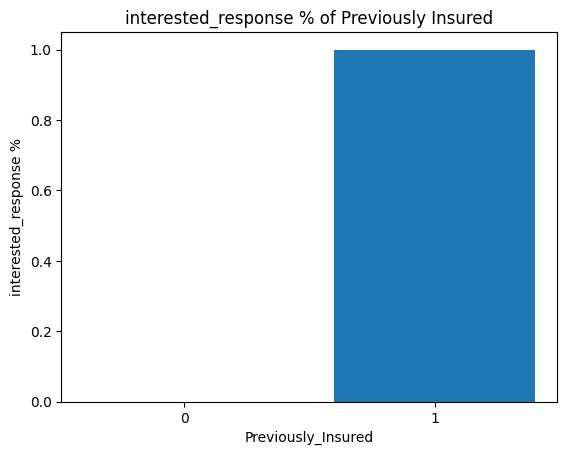

In [395]:
# Ploting interested_response % of Previously_Insured


plt.bar(df_Previously_Insured_Response_count['Previously_Insured'].astype('str'),
        df_Previously_Insured_Response_count['Previously_Insured'])
plt.xlabel("Previously_Insured")
plt.ylabel("interested_response %")
plt.title("interested_response % of Previously Insured")

##### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to International plan, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

customer Previously Insured 206480 out that 46552 have an interested response which is 22.55% of customers Previously Insured

customer Previously not Insured 174628 out of that 158 have interested responses which are 0.09% of the customer not Previously Insured

##### 3. Will the gained insights help creating a positive business impact? 

Yes, the gained insights can help create a positive business impact. Based on the data, it appears that customers who were previously insured have a much higher likelihood of responding positively to a cross-sell offer for health insurance. This means that the company could potentially target their marketing efforts towards previously insured customers, which would likely result in a higher conversion rate and ultimately a positive impact on the business. 

The low response rate among customers who were not previously insured suggests that it may not be as effective to target them for cross-sell offers, which could help the company save resources and optimize their marketing efforts.

## Exploring Vehicle_Age feature - Univariate and Bivariate analysis

In [396]:
# cheking unique values

df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [397]:
# checking value count

df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Text(0.5, 1.0, 'Pie Chart For Vehicle Age')

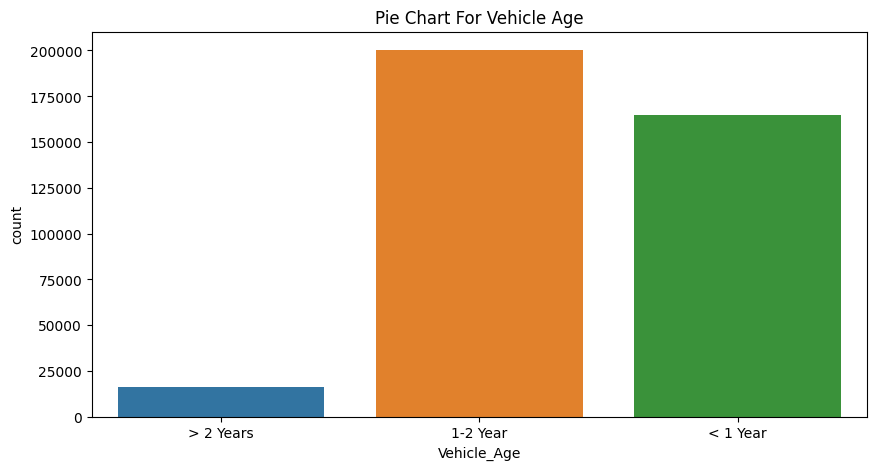

In [398]:
# Ploting value counts

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df['Vehicle_Age'],data=df)
plt.title('Pie Chart For Vehicle Age')

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the count of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

There is 200316 vehicles age between 1-2 Years.

There is 164786 vehicles age < 1 Year.

There is 16007 vehicles age > 2 Years.


In [399]:
# creating df Vehicle_Age interested Response count%

Vehicle_Age=(df['Vehicle_Age'].unique())
interested_response=[df[(df['Vehicle_Age']==code)]['Response'].value_counts()[1] for code in Vehicle_Age]
not_interested_response=[df[(df['Vehicle_Age']==code)]['Response'].value_counts()[0] for code in Vehicle_Age]

df_Previously_Vehicle_Age_count=pd.DataFrame({'Vehicle_Age' : Vehicle_Age,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_Previously_Vehicle_Age_count['interested_response %']= round(((df_Previously_Vehicle_Age_count['interested_response'])/
                                                 ((df_Previously_Vehicle_Age_count['interested_response'])+ 
                                                         (df_Previously_Vehicle_Age_count['not_interested_response'])))*100,2)
df_Previously_Vehicle_Age_count['not_interested_response %']= round(((df_Previously_Vehicle_Age_count['not_interested_response'])/
                                                  ((df_Previously_Vehicle_Age_count['interested_response'])+ 
                                                         (df_Previously_Vehicle_Age_count['not_interested_response'])))*100,2)
df_Previously_Vehicle_Age_count

Vehicle_Age  interested_response  not_interested_response  \
0   > 2 Years                 4702                    11305   
1    1-2 Year                34806                   165510   
2    < 1 Year                 7202                   157584   

   interested_response %  not_interested_response %  
0                  29.37                      70.63  
1                  17.38                      82.62  
2                   4.37                      95.63

Text(0.5, 1.0, 'interested_response % of each Vehicle_Age')

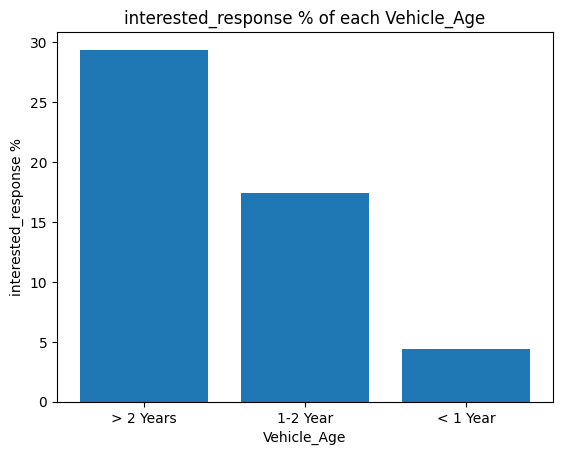

In [400]:
# Ploting churn rate % of each area

plt.bar(df_Previously_Vehicle_Age_count['Vehicle_Age'],df_Previously_Vehicle_Age_count['interested_response %'])
plt.xlabel("Vehicle_Age")
plt.ylabel("interested_response %")
plt.title("interested_response % of each Vehicle_Age")

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

There is three vehicle age i.g. 1-2 Year, < 1 Year, > 2 Years

vehicle age > 2 Years have 29.37% interested response
vehicle age 1-2 Year have 17.38% interested response
vehicle age < 1 Year have 4.37% interested response

The insight found from the chart is that people with vehicle age older than 2 years are more likely to show interest in purchasing insurance compared to those with vehicle age 1-2 years and less than 1 year.

##### 3. Will the gained insights help creating a positive business impact?   

Yes, the gained insights can help create a positive business impact as it can guide the insurance company to focus their marketing efforts towards people with vehicles older than 2 years. 

By targeting this group, the company may see an increase in their health insurance cross-sell and potentially result in higher sales and revenue.

This information can be used to design targeted marketing campaigns, promotions and incentives that may further increase the interest among this group.

## Exploring Vehicle_Damage feature - Univariate and Bivariate analysis

In [401]:
# cheking unique values
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [402]:
# checking value count
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

Text(0.5, 1.0, 'Pie Chart For Vehicle_Damage')

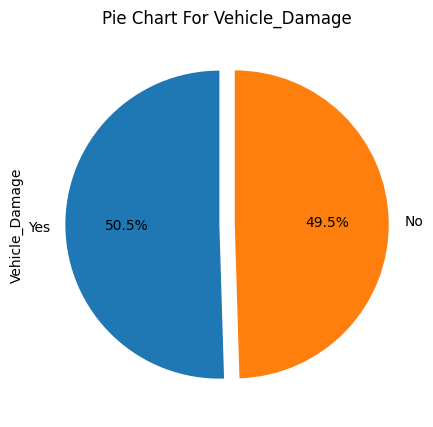

In [403]:
# Ploting value counts

df['Vehicle_Damage'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90, figsize=(5,5))
plt.title('Pie Chart For Vehicle_Damage')

##### 1. Why did you pick the specific chart?

Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.


##### 2. What is/are the insight(s) found from the chart?

Past damages present in 50.5% customer.

No Past damages present in 49.5% customer.

In [404]:
# creating df Vehicle_Damage interested Response count%

Vehicle_Damage=(df['Vehicle_Damage'].unique())
interested_response=[df[(df['Vehicle_Damage']==code)]['Response'].value_counts()[1] for code in Vehicle_Damage]
not_interested_response=[df[(df['Vehicle_Damage']==code)]['Response'].value_counts()[0] for code in Vehicle_Damage]

df_Previously_Vehicle_Damage_count=pd.DataFrame({'Vehicle_Damage' : Vehicle_Damage,
                                       'interested_response'  : interested_response,
                                       'not_interested_response' : not_interested_response})

df_Previously_Vehicle_Damage_count['interested_response %']= round(((df_Previously_Vehicle_Damage_count['interested_response'])/
                                                 ((df_Previously_Vehicle_Damage_count['interested_response'])+ 
                                                         (df_Previously_Vehicle_Damage_count['not_interested_response'])))*100,2)
df_Previously_Vehicle_Damage_count['not_interested_response %']= round(((df_Previously_Vehicle_Damage_count['not_interested_response'])/
                                                  ((df_Previously_Vehicle_Damage_count['interested_response'])+ 
                                                         (df_Previously_Vehicle_Damage_count['not_interested_response'])))*100,2)
df_Previously_Vehicle_Damage_count

Vehicle_Damage  interested_response  not_interested_response  \
0            Yes                45728                   146685   
1             No                  982                   187714   

   interested_response %  not_interested_response %  
0                  23.77                      76.23  
1                   0.52                      99.48

Text(0.5, 1.0, 'interested_response % of Vehicle_Damage')

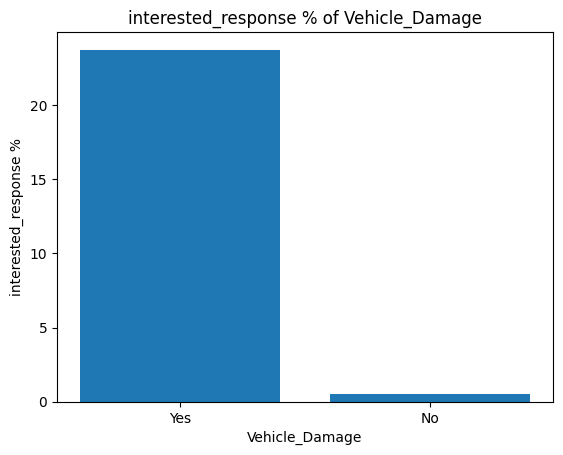

In [405]:
# Ploting 	interested_response % of Vehicle_Damage

plt.bar(df_Previously_Vehicle_Damage_count['Vehicle_Damage'].astype('str'),df_Previously_Vehicle_Damage_count['interested_response %'])
plt.xlabel("Vehicle_Damage")
plt.ylabel("interested_response %")
plt.title("interested_response % of Vehicle_Damage")

##### 1. Why did you pick the specific chart?

Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to International plan, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

There are Past Vehicle damages present then 23.77% of customers have an interested response

There are No Vehicle Past damages present in then 0.52	% of customers have interested response

The insight found from the chart is that customers with a history of vehicle damages are more likely to respond positively to a cross-sell offer for insurance.

##### 3. Will the gained insights help creating a positive business impact?  

Yes, the gained insight can help create a positive business impact. By targeting customers with a history of vehicle damages, the company can increase the chances of a successful cross-sell campaign and potentially increase sales revenue. 


## Exploring Annual_Premium feature - Univariate and Bivariate analysis

In [406]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [407]:
# Creating Annual_Premium interested or not interested Response df

Annual_Premium_interested=df[(df['Response']==1)]
Annual_Premium_not_interested=df[(df['Response']==0)]

In [408]:
# Mean 

print('Mean of Annual_Premium of all data',df['Annual_Premium'].mean())
print('Mean of Annual_Premium of interested Response',Annual_Premium_not_interested['Annual_Premium'].mean())
print('Mean of Annual_Premium of Not interested Response',Annual_Premium_not_interested['Annual_Premium'].mean())
print()

# Median 


print('Median of Annual_Premium of all data',df['Annual_Premium'].median())
print('Median of Annual_Premium of interested Response',Annual_Premium_not_interested['Annual_Premium'].median())
print('Median of Annual_Premium of Not interested Response',Annual_Premium_not_interested['Annual_Premium'].median())

Mean of Annual_Premium of all data 30564.389581458323
Mean of Annual_Premium of interested Response 30419.16027559891
Mean of Annual_Premium of Not interested Response 30419.16027559891

Median of Annual_Premium of all data 31669.0
Median of Annual_Premium of interested Response 31504.0
Median of Annual_Premium of Not interested Response 31504.0


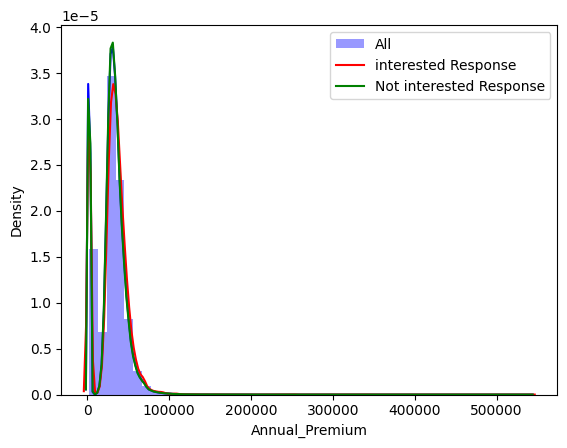

In [409]:
sns.distplot(df['Annual_Premium'], color='blue' , label='All') 
sns.distplot(Annual_Premium_interested['Annual_Premium'],color='red' , label='interested Response',hist=False)
sns.distplot(Annual_Premium_not_interested['Annual_Premium'],color='green' , label='Not interested Response',hist=False) 
plt.legend()

##### 1. Why did you pick the specific chart?

The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart show that the mean and median of the annual premium for all data, interested response, and not interested response are similar, with only a slight difference in values.


## Exploring Vintage feature - Univariate and Bivariate analysis

In [410]:
# Creating Vintage interested or not interested Response df

Vintage_interested=df[(df['Response']==1)]
Vintage_not_interested=df[(df['Response']==0)]

In [411]:
# Mean 

print('Mean of Vintage of all data',df['Vintage'].mean())
print('Mean of Vintage of interested Response',Annual_Premium_not_interested['Vintage'].mean())
print('Mean of Vintage of Not interested Response',Annual_Premium_not_interested['Vintage'].mean())
print()

# Median 


print('Median of Vintage of all data',df['Vintage'].median())
print('Median of Vintage of interested Response',Annual_Premium_not_interested['Vintage'].median())
print('Median of Vintage of Not interested Response',Annual_Premium_not_interested['Vintage'].median())

Mean of Vintage of all data 154.34739667654136
Mean of Vintage of interested Response 154.38024336197176
Mean of Vintage of Not interested Response 154.38024336197176

Median of Vintage of all data 154.0
Median of Vintage of interested Response 154.0
Median of Vintage of Not interested Response 154.0


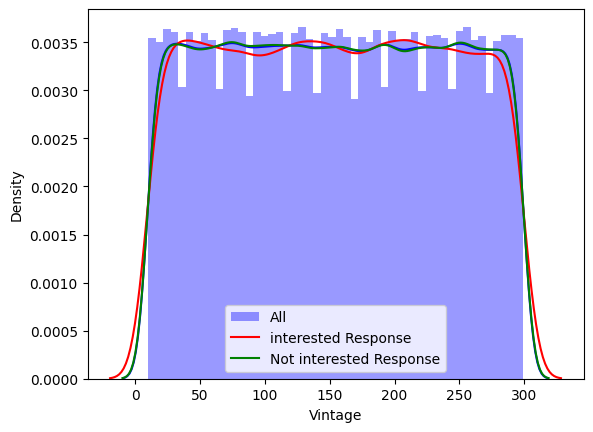

In [412]:
sns.distplot(df['Vintage'], color='blue' , label='All') 
sns.distplot(Annual_Premium_interested['Vintage'],color='red' , label='interested Response',hist=False)
sns.distplot(Annual_Premium_not_interested['Vintage'],color='green' , label='Not interested Response',hist=False) 
plt.legend()

##### 1. Why did you pick the specific chart?

The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

##### 2. What is/are the insight(s) found from the chart?

The mean and median of the number of days a customer has been associated with the company for all data, interested response and not interested response are very similar, indicating that the length of customer association with the company does not have a significant impact on their interest in purchasing health insurance cross sell.

The mean and median number of days for all data, interested response, and not interested response is 154, indicating that the majority of customers have been associated with the company for around 154 days.

##### 3. Will the gained insights help creating a positive business impact?  

This indicates that the length of time a customer has been associated with the company does not have a significant impact on their likelihood of being interested in purchasing additional health insurance.

## Correlation Heatmap

<AxesSubplot: >

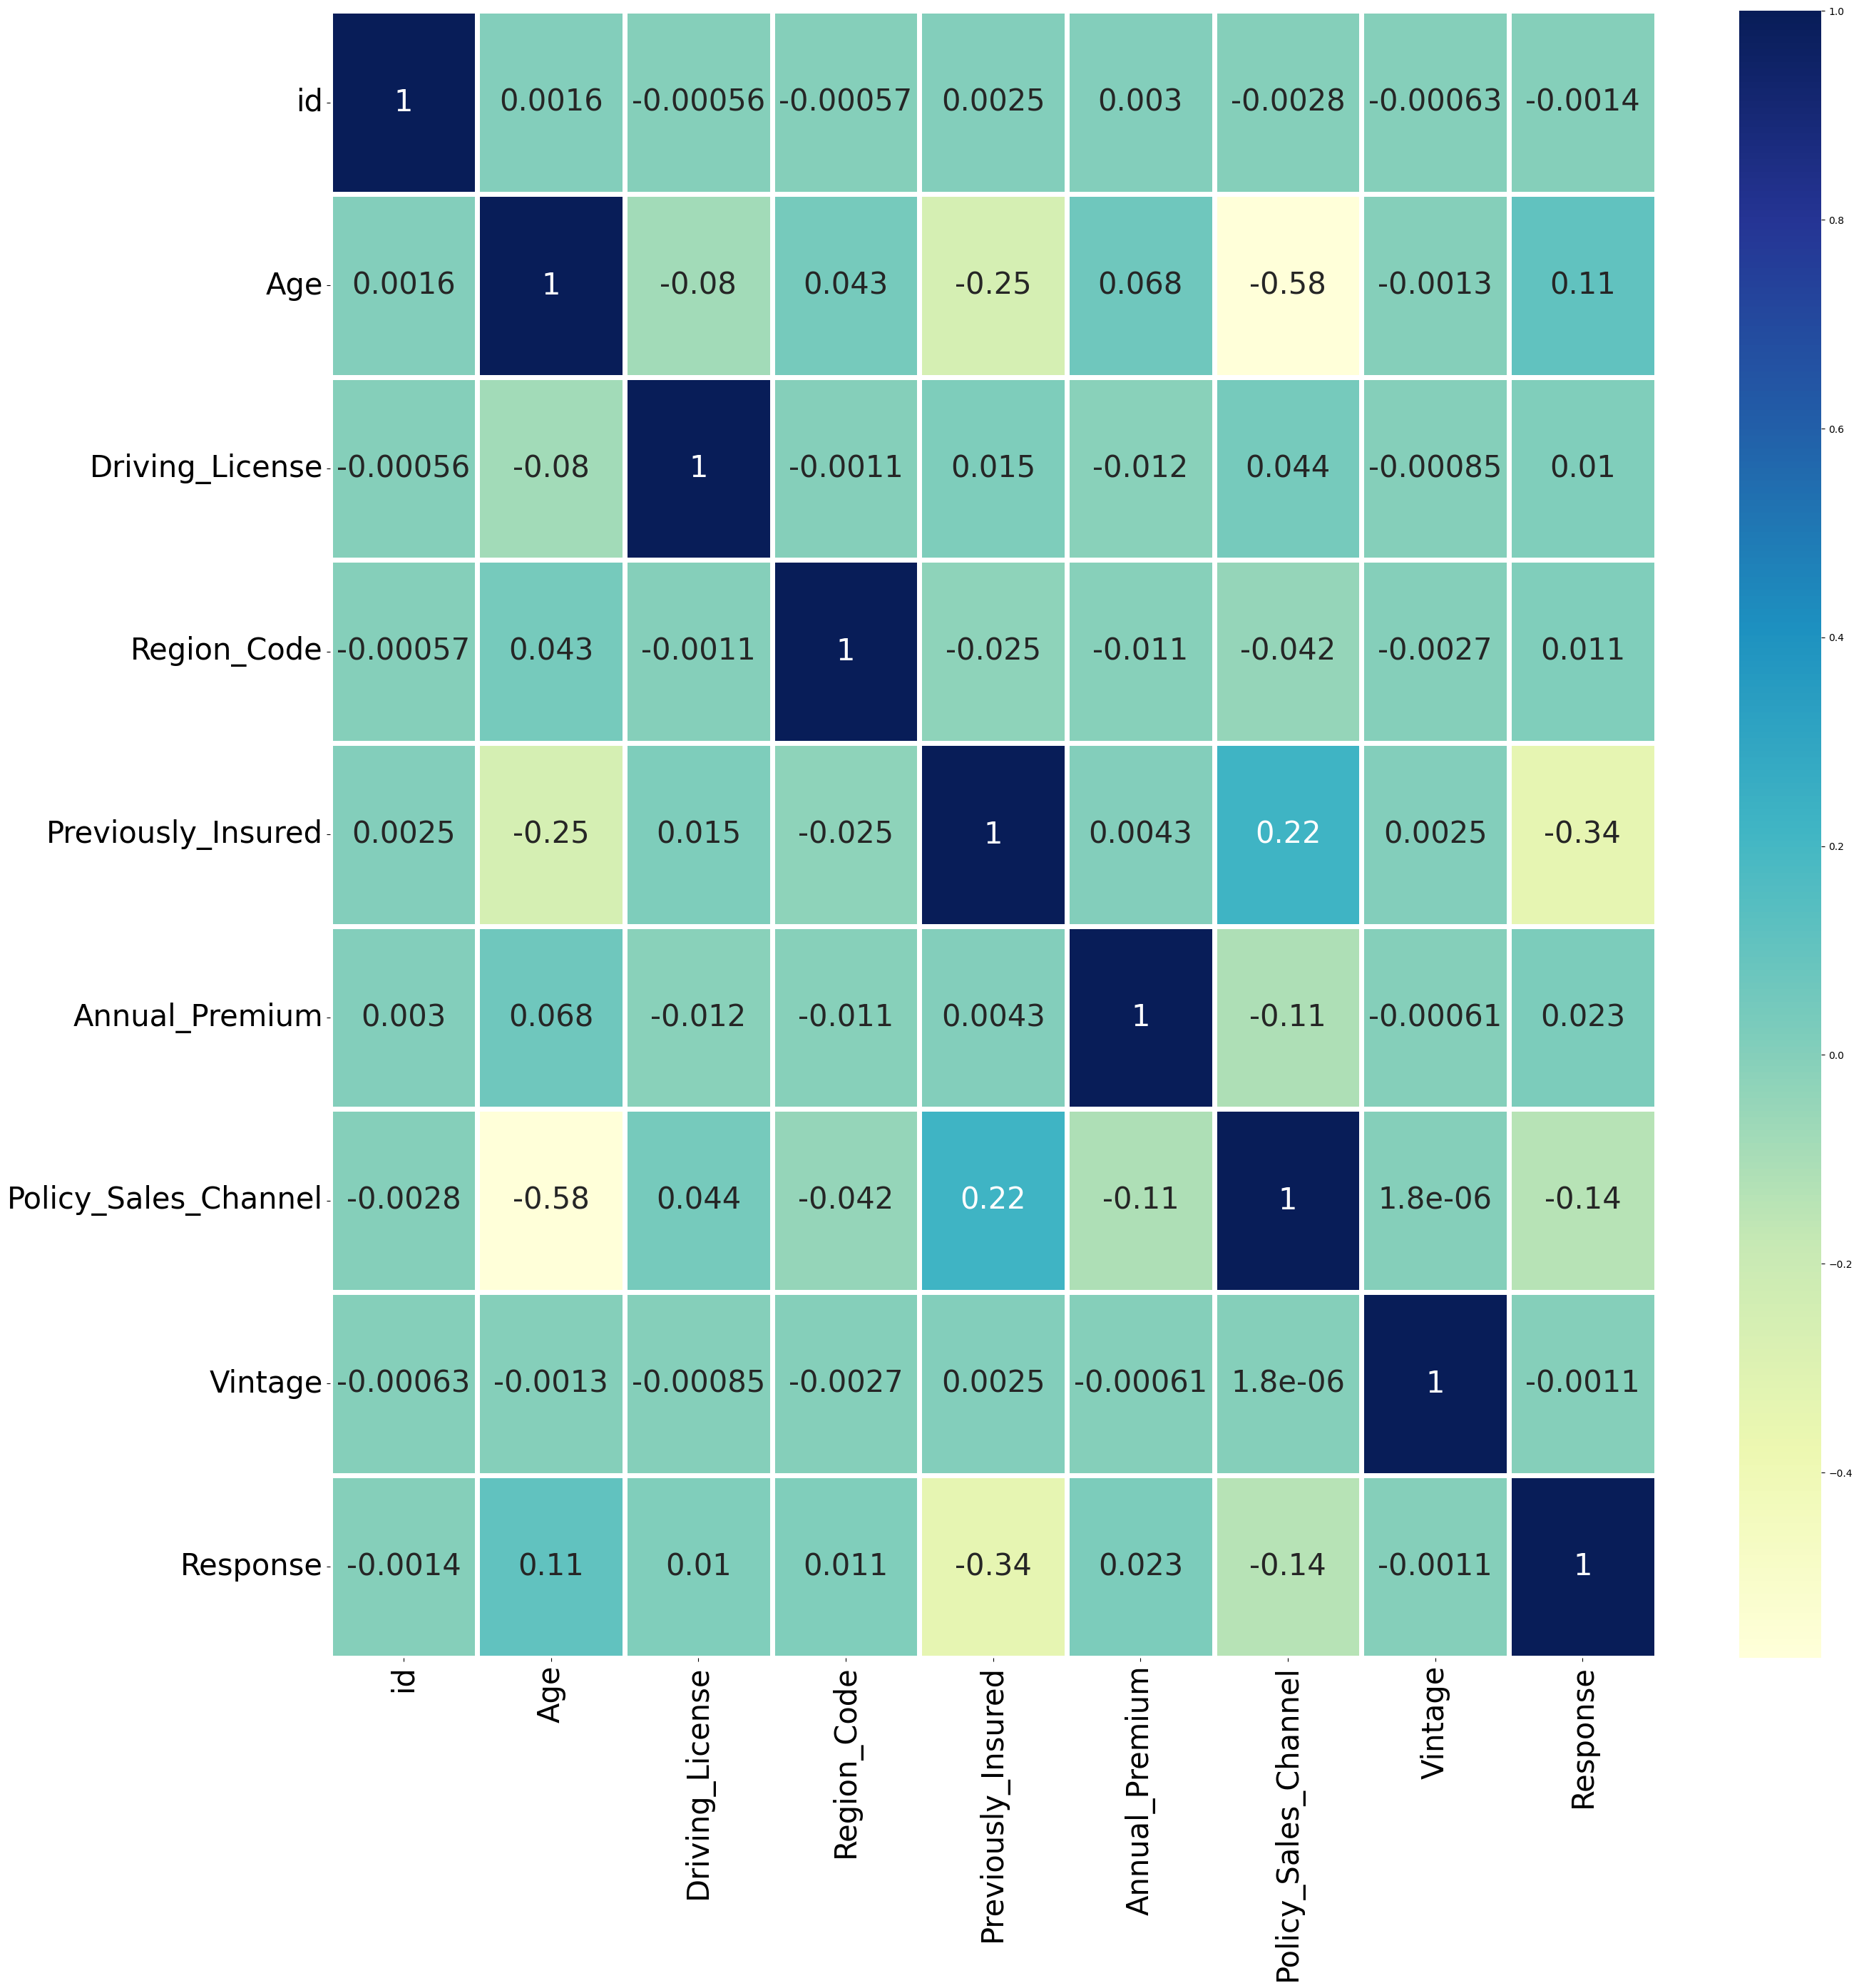

In [413]:
plt.figure(figsize=(30,30))
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30, rotation=90)
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, annot_kws={"fontsize":30},linewidths=5)

##### 1. Why did you pick the specific chart?

A heatmap chart is a way to represent this data visually, making it easy to identify patterns and relationships between different features. The heatmap uses a color scale to represent the values in the matrix, with higher values represented by darker colors and lower values represented by lighter colors. This allows you to quickly identify areas of the matrix where the values are high or low, which can indicate patterns or trends in the data.

Furthermore, heatmap chart provides a clear and concise way to compare different features of the data to identify the relationship and correlation. For example, you can use a heatmap to compare the usage patterns, and identify which features are most strongly associated with churn.


##### 2. What is/are the insight(s) found from the chart?

Correlation: The pairplot chart can show the correlation between different features and how they are related to churn. For example, a strong correlation between total international charges and churn would suggest that customers with higher international charges are more likely to churn.

Distribution: The pairplot chart can show the distribution of the data for each feature and how it is related to churn. For example, if a feature has a skewed distribution with a large number of outliers, it could indicate that certain customers have unusual usage patterns that may contribute to their likelihood of churning.

Outliers: The pairplot chart can help identify outliers in the data and how they relate to churn. For example, if a customer has unusually high usage of a certain feature, it could indicate that they are more likely to churn.

Trends: The pairplot chart can also help identify trends in the data, such as if a certain feature is increasing or decreasing over time, and how it relates to churn.

Overall, the insights provided by the pairplot chart can help the company better understand the relationship between different features and churn, and use this information to improve customer retention and revenue.

## Pair Plot 

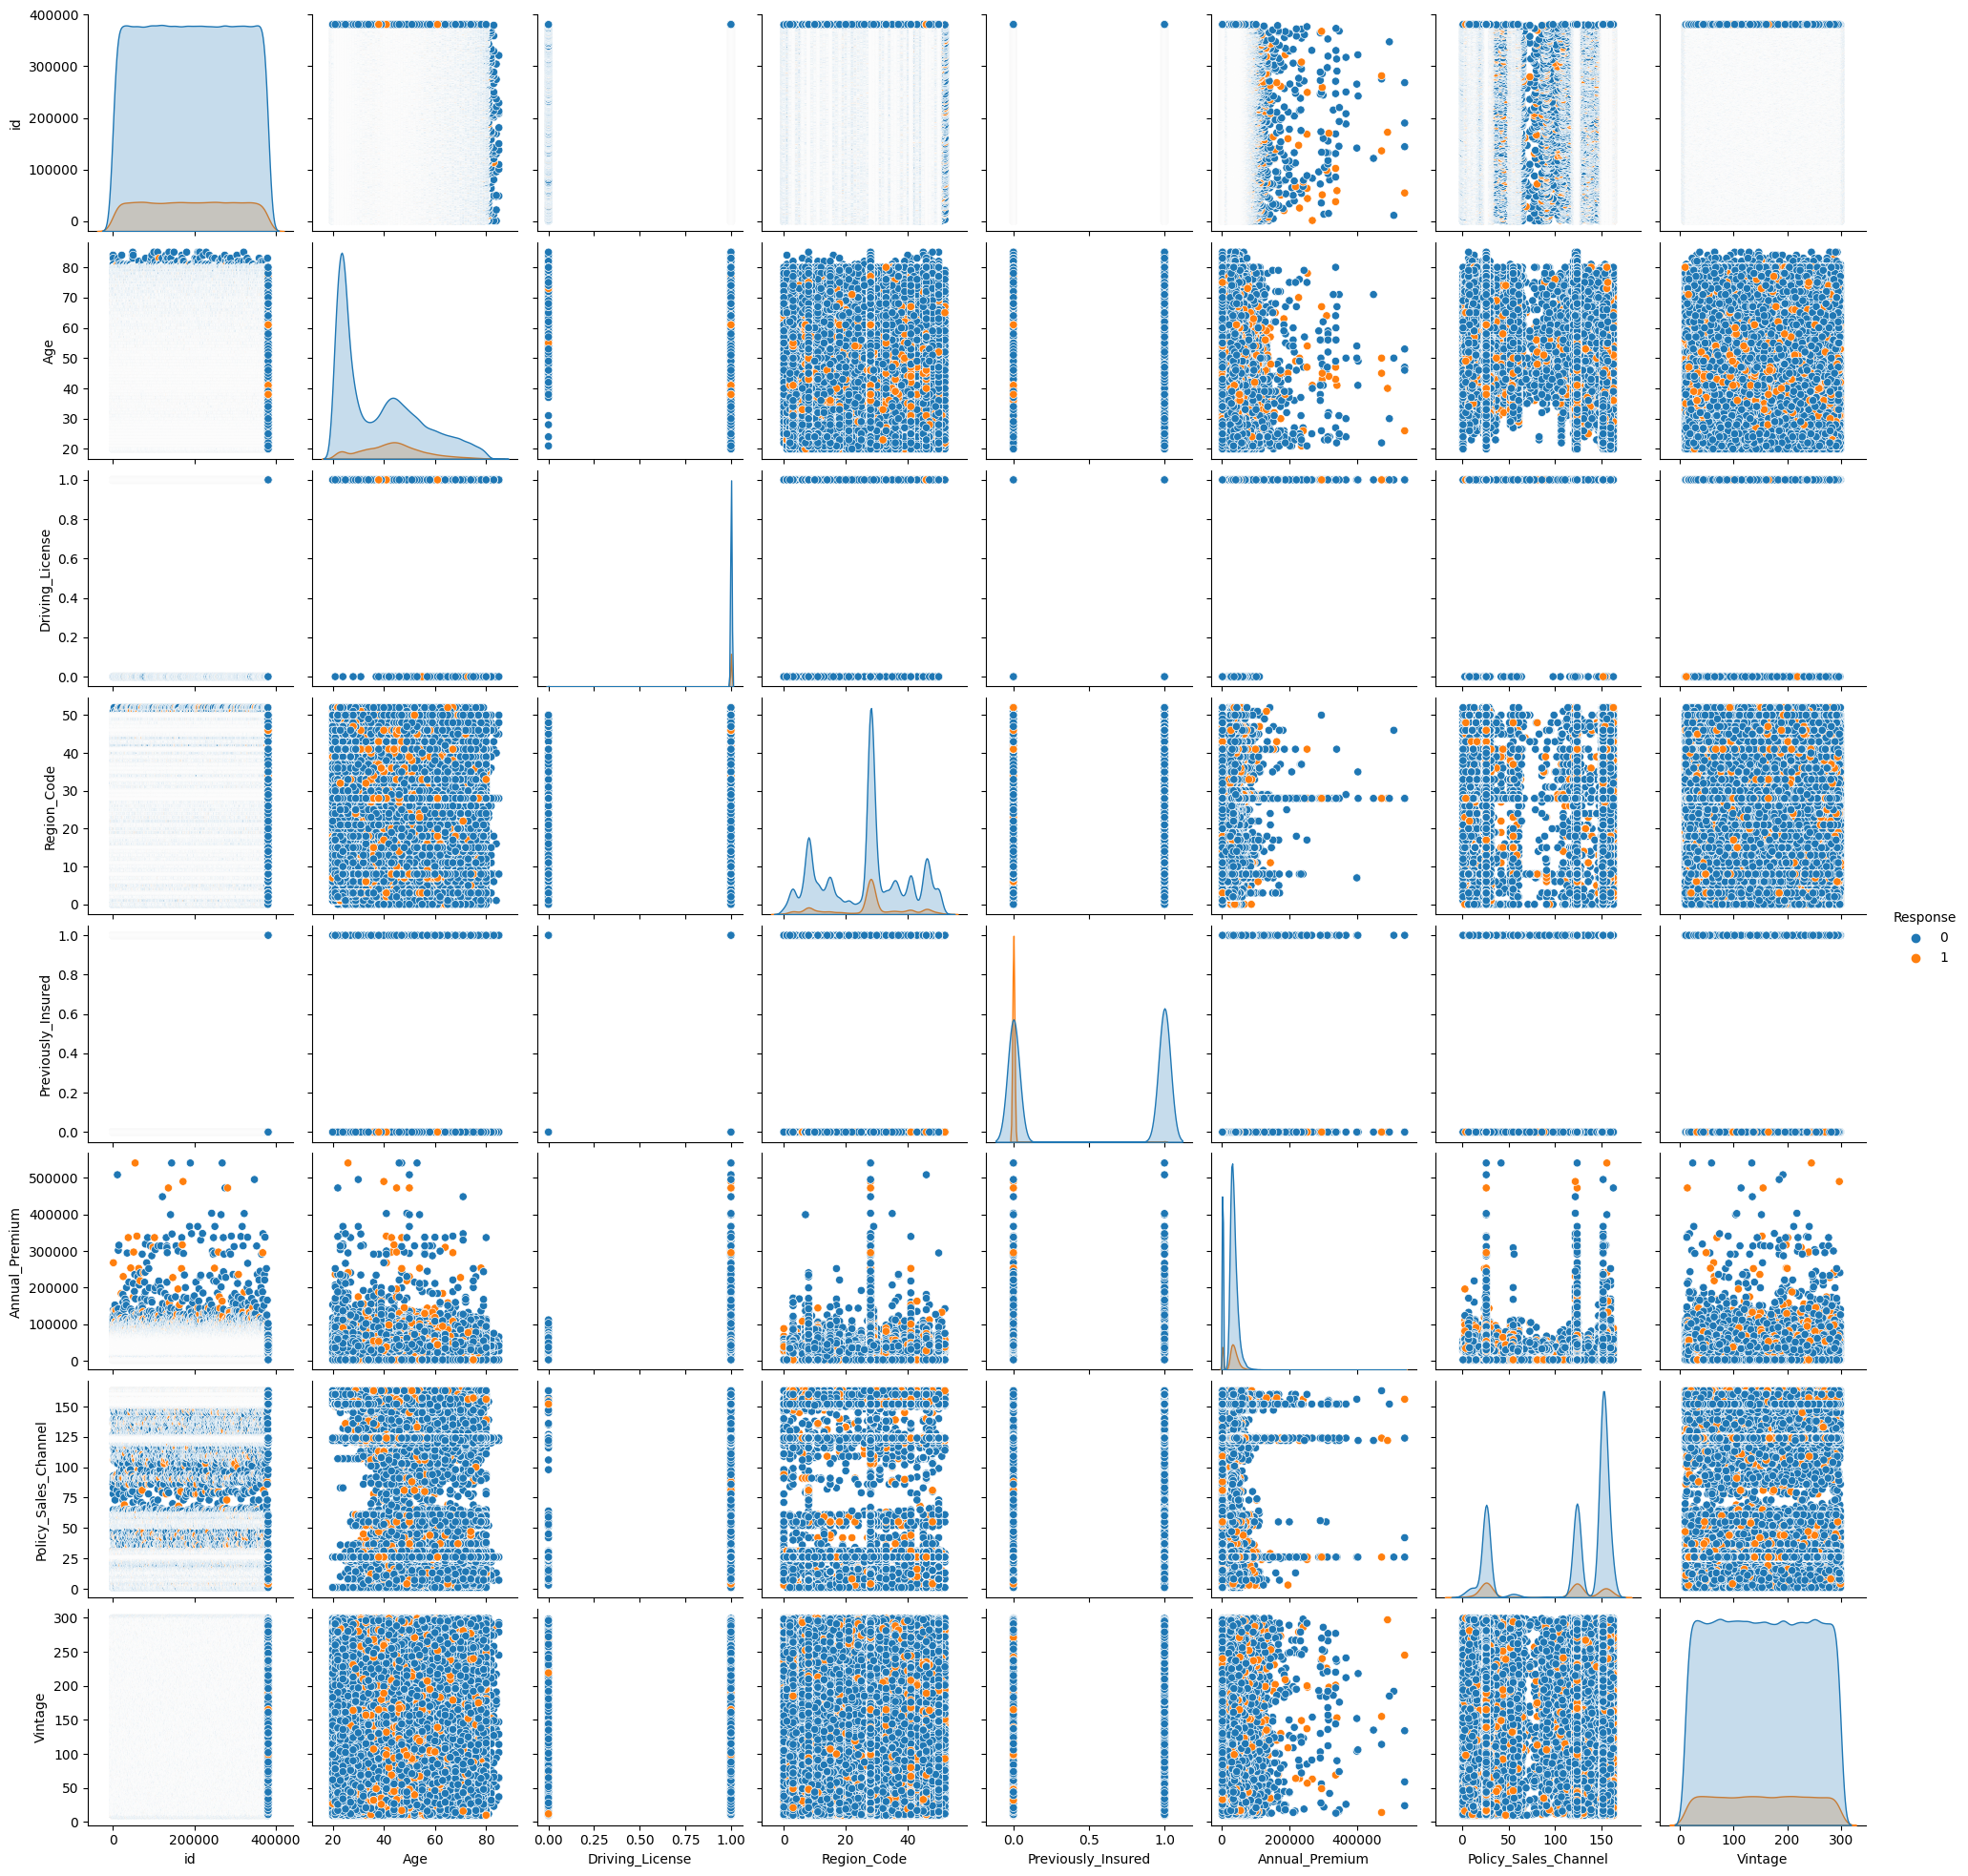

In [414]:
sns.pairplot(df, hue="Response")

##### 1. Why did you pick the specific chart?

I picked the pairplot chart because it is a useful tool for visualizing relationships between multiple variables in a dataset. A pairplot chart plots all pairs of variables in a dataset against each other in a matrix format, allowing for easy comparison and identification of patterns. The chart also includes a diagonal line that shows a distribution of a single variable.

In the context of Telecom Churn Analysis, a pairplot chart can help identify relationships between different variables (such as charge types, minutes types, and customer demographics) and churn. For example, if there is a strong relationship between high international charges and churn, this would be clearly visible in a pairplot chart. Additionally, a pairplot chart can also help identify any outliers or unusual patterns in the data, which can provide further insights into the causes of churn. Overall, the pairplot chart is a useful tool for visualizing relationships between multiple variables in a dataset and identifying patterns that can help prevent churn.


##### 2. What is/are the insight(s) found from the chart?

Identifying the correlation among features: A heatmap can be used to identify the correlation among different features, such as the correlation between Number vmail messages and Account length. This can help to understand the relationship between different features and the effect they have on churn.

Identifying areas of high and low churn: By comparing the usage patterns of customers who have canceled their service to those who have not, a heatmap can help to identify which features are most strongly associated with churn. This can help to pinpoint areas where the company may need to improve its service or offer more competitive pricing.

In [415]:
# Divide the data into two groups: those who have health insurance and those who do not
intrested = data[data['Response'] == 1]
not_intrested = data[data['Response'] == 0]

# Calculate the means of the two groups
mean_intrested = intrested['Age'].mean()
mean_not_intrested = not_intrested['Age'].mean()

# Conduct a two-sample t-test to see if the difference in means is significant
t_stat, p_value = ttest_ind(intrested['Age'], not_intrested['Age'])

# Decide whether to reject or fail to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the means of the two groups.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that there is a significant difference in the means of the two groups.")

Reject the null hypothesis. There is a significant difference in the means of the two groups.


# Data Preprocessing

## Ckechking null or missing values

In [416]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In our data there in no missing value

## Handling Outliers

In [417]:
def iqr_whisker(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    print (f'IQR = {iqr}')
    print (f'lower_whisker = {lower_whisker}')
    print (f'upper_whisker = {upper_whisker}')

## Checking outliers for Age

<AxesSubplot: >

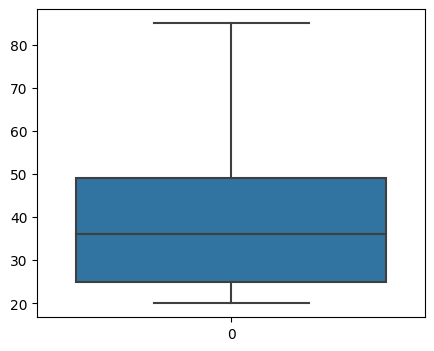

In [418]:


plt.figure(figsize=(5,4))
sns.boxplot(df.Age)

### In Age column there is no outliers

## Checking outliers for Annual_Premium

<AxesSubplot: >

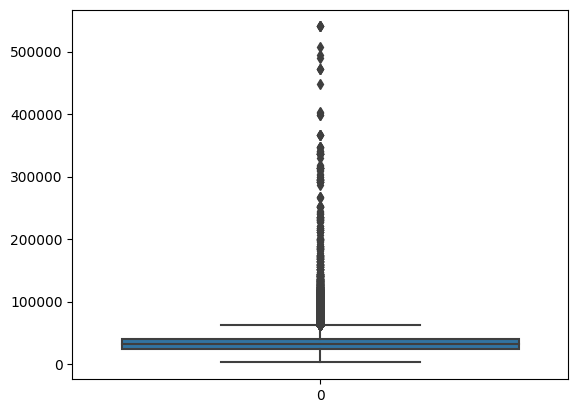

In [419]:
sns.boxplot(df.Annual_Premium)

#### there is outliers in upper side

### Log transrormation looking good because gives rough bell shape curve 

In [420]:
# Applying log transformation
df['Annual_Premium']=np.log(df['Annual_Premium'])

In [421]:
iqr_whisker(df['Annual_Premium'])

IQR = 0.47897778696477644
lower_whisker = 9.384076627874084
upper_whisker = 11.29998777573319


In [422]:
df['Annual_Premium'].describe()

count    381109.000000
mean         10.014695
std           1.005080
min           7.874739
25%          10.102543
50%          10.363094
75%          10.581521
max          13.199630
Name: Annual_Premium, dtype: float64

In [423]:
# handling outliers
df.loc[df['Annual_Premium']>11.3,'Annual_Premium']=11.3
df.loc[df['Annual_Premium']<9.39,'Annual_Premium']=9.39

{'whiskers': [<matplotlib.lines.Line2D at 0x1e81b0de8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e81b0dedf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e81b0de610>],
 'medians': [<matplotlib.lines.Line2D at 0x1e81b0ed370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e81b0ed610>],
 'means': []}

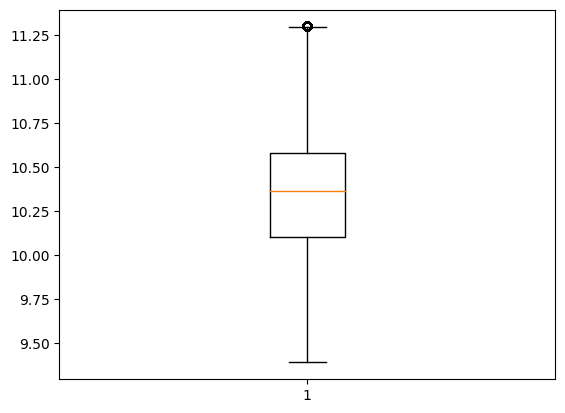

In [424]:
plt.boxplot(df['Annual_Premium'])

## Checking outliers for Vintage

In [425]:
df["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e81b10ddf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e81b11e370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e81b10db50>],
 'medians': [<matplotlib.lines.Line2D at 0x1e81b11e8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e81b11eb50>],
 'means': []}

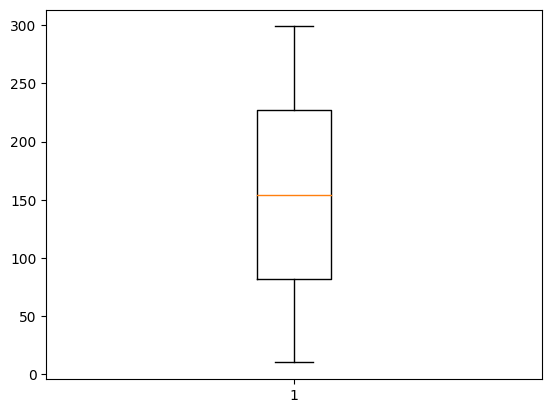

In [426]:
plt.boxplot(df['Vintage'])

### There is no outliers in Vintage

## Convert categorical data into numerical data

In [427]:
df["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [428]:
df['Vehicle_Age'] = df['Vehicle_Age'].replace(['> 2 Years','1-2 Year','< 1 Year'],[2,1,0])
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,2])
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace(['Yes','No'],[1,0])

In [429]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1   44                1         28.0                   0   
1   2       1   76                1          3.0                   0   
2   3       1   47                1         28.0                   0   
3   4       1   21                1         11.0                   1   
4   5       2   29                1         41.0                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0            2               1       10.607921                  26.0      217   
1            1               0       10.420375                  26.0      183   
2            2               1       10.553049                  26.0       27   
3            0               0       10.261826                 152.0      203   
4            0               0       10.221796                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

# Hypothesis Testing


## Hypothetical Statement

Younger (Age < 30) customers are less likely to intrest in buying vehicle insurance

Null Hypothesis: Age < 30

Alternate Hypothesis : Age > 30

In [447]:
# separate the data into two groups based on age
younger_group = data[data["Age"] < 30]
older_group = data[data["Age"] >= 30]

# calculate the proportion of customers who cross-sold 
younger_prop = sum(younger_group["Response"]==1) / len(younger_group)
older_prop = sum(older_group["Response"]==1) / len(older_group)

# calculate the standard error for each proportion
younger_se = np.sqrt(younger_prop * (1 - younger_prop) / len(younger_group))
older_se = np.sqrt(older_prop * (1 - older_prop) / len(older_group))

# calculate the z-score
z = (younger_prop - older_prop) / np.sqrt(younger_se**2 + older_se**2)

# calculate the p-value
p_value = stats.norm.sf(abs(z)) * 2

# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence that younger customers are less likely to cross-sell into vehicle insurance.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that younger customers are less likely to cross-sell intovehicle insurance.")


Reject the null hypothesis. There is evidence that younger customers are less likely to cross-sell into vehicle insurance.


## Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected 

# Feature Selection

In [431]:
X=df.drop(['Response'],axis=1)
y=df['Response']

## Feature selection using Information Gain

<AxesSubplot: >

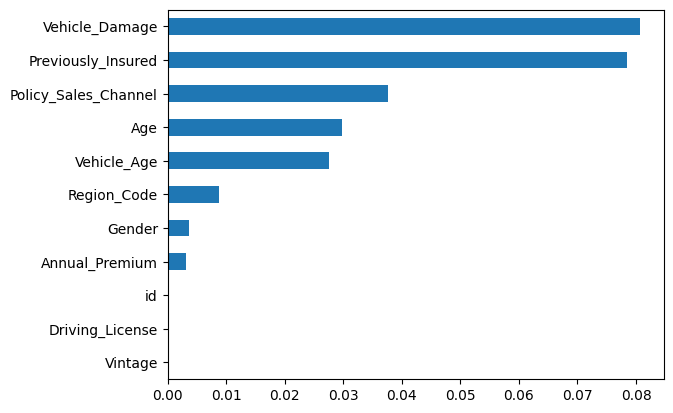

In [432]:
array = mutual_info_regression(X,y)
s1 = pd.Series(array, index=X.columns)
s1.sort_values().plot(kind='barh')

In [433]:
# Droping unwanted column
df.drop(['id','Vintage','Driving_License'],axis=1)

Gender  Age  Region_Code  Previously_Insured  Vehicle_Age  \
0            1   44         28.0                   0            2   
1            1   76          3.0                   0            1   
2            1   47         28.0                   0            2   
3            1   21         11.0                   1            0   
4            2   29         41.0                   1            0   
...        ...  ...          ...                 ...          ...   
381104       1   74         26.0                   1            1   
381105       1   30         37.0                   1            0   
381106       1   21         30.0                   1            0   
381107       2   68         14.0                   0            2   
381108       1   46         29.0                   0            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Response  
0                    1       10.607921                  26.0         1  
1                    0       10.420375                  26.0         0  
2                    1       10.553049                  26.0         1  
3                    0       10.261826                 152.0         0  
4                    0       10.221796                 152.0         0  
...                ...             ...                   ...       ...  
381104               0       10.314603                  26.0         0  
381105               0       10.597035                 152.0         0  
381106               0       10.466469                 160.0         0  
381107               1       10.705870                 124.0         0  
381108               0       10.640101                  26.0         0  

[381109 rows x 9 columns]

# Train Test split

In [434]:
X=df.drop(['Response'],axis=1)
y=df['Response']

In [435]:
# OVER SAMPLING
sm=SMOTE()
X_Over,y_Over=sm.fit_resample(X,y)

In [436]:
y_Over.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [437]:
# Data spliting without oversampling

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [438]:
# Data spliting with oversampling

X_Over_train,X_Over_test,y_Over_train,y_Over_test=train_test_split(X_Over,y_Over,random_state=0,test_size=0.2)

In [439]:
y_Over_test

303503    0
195904    0
244117    0
332318    0
316103    0
         ..
448776    1
176611    0
303189    0
175470    0
204838    0
Name: Response, Length: 133760, dtype: int64

# Model Buliding

In [440]:
# Defining functon for Accuracy Score, Confusion Matrix and Classification_report

def train_test_acc_cnf_clf_rep (y_train,y_test,y_pred_train,y_pred_test):
    from sklearn.metrics import accuracy_score
    acc_score_test = accuracy_score(y_test,y_pred_test)
    print(f"Accuracy Score For Test : {acc_score_test*100} %")
    print()
    acc_score_train = accuracy_score(y_train,y_pred_train)
    print(f"Accuracy Score For Train: {acc_score_train*100} %")
    print()
    print('-'*120)
    cnf_matrix_test = confusion_matrix(y_test,y_pred_test)
    print('Confusion Matrix For Test :\n\n',cnf_matrix_test)
    print()
    cnf_matrix_train = confusion_matrix(y_train,y_pred_train)
    print('Confusion Matrix For Train :\n\n',cnf_matrix_train)
    print()
    print('-'*120)
    clf_report_test = classification_report(y_test , y_pred_test)
    print('Classification_report For Test: \n\n',clf_report_test)
    print()
    clf_report_train = classification_report(y_train , y_pred_train)
    print('Classification_report For Train: \n\n',clf_report_train)
    
    
# print('F-1 Score : ',(f1_score(y_test, y_pred)))
# print('Precision Score : ',(precision_score(y_test, y_pred)))
# print('Recall Score : ',(recall_score(y_test, y_pred)))

In [441]:
# Defining functon for Roc-Auc curve
def plot_roc_auc(model,X_test,y_test,name): 
    plt.figure(figsize=(5,5))
    # Predict probabilities for test and train data
    y_train_probs = model.predict_proba(X_train)[:, 1]
    y_test_probs = model.predict_proba(X_test)[:, 1]

    # Calculate AUC ROC for test and train data
    train_auc = roc_auc_score(y_train, y_train_probs)
    test_auc = roc_auc_score(y_test, y_test_probs)

    # Plot ROC curve for test and train data
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_probs)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_probs)

    plt.plot(fpr_train, tpr_train, label='Train (AUC = %0.3f)' % train_auc)
    plt.plot(fpr_test, tpr_test, label='Test (AUC = %0.3f)' % test_auc)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve for {name}')
    plt.legend(loc='lower right')
    plt.show()

# Logistic Regression

In [442]:
# Logistic Regression - without oversampling

log_model=LogisticRegression()
log_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_log_test= log_model.predict(X_test)
y_pred_log_train = log_model.predict(X_train)

In [443]:
# Accuracy Score, Confusion Matrix and Classification_report

train_test_acc_cnf_clf_rep(y_train,y_test,y_pred_log_train,y_pred_log_test)

Accuracy Score For Test : 87.69908950171866 %

Accuracy Score For Train: 87.75480751885124 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[66846     0]
 [ 9376     0]]

Confusion Matrix For Train :

 [[267553      0]
 [ 37334      0]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93    267553
           1       0.00    

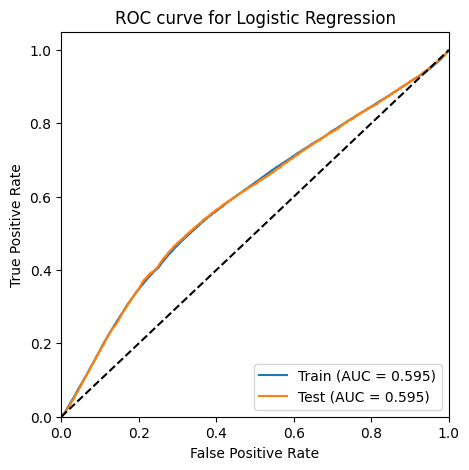

In [444]:
# Roc-Auc Curve

plot_roc_auc(log_model,X_test,y_test,'Logistic Regression')

### Logistic Regression (without oversampling):

The accuracy score for the test data is 87.70% and for the train data is 87.75%. This indicates that the model is able to correctly predict the target class 87.70% of the time on the test data and 87.75% of the time on the train data.

The confusion matrix for the test data shows that there are 66846 true positive predictions and 9376 false positive predictions. The model has not predicted any true negatives or false negatives.

The precision for the test data is 0.44, which indicates that out of all the positive predictions made by the model, 44% of them are actually true. The recall for the test data is 0.5, which indicates that out of all the actual positive instances, the model was able to predict 50% of them. The f1-score for the test data is 0.47, which is the harmonic mean of precision and recall.

## Logistic Regression (with oversampling)

In [445]:
# logistic - with oversampling

log_model=LogisticRegression()
log_model.fit(X_Over_train,y_Over_train)

# Making predictions on train and test data
y_pred_log_test= log_model.predict(X_Over_test)
y_pred_log_train = log_model.predict(X_Over_train)

In [446]:
# Accuracy Score, Confusion Matrix and Classification_report

train_test_acc_cnf_clf_rep(y_Over_train,y_Over_test,y_pred_log_train,y_pred_log_test)

Accuracy Score For Test : 56.75538277511962 %

Accuracy Score For Train: 56.93576904817975 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[42958 23992]
 [33852 32958]]

Confusion Matrix For Train :

 [[173040  94409]
 [136001 131588]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.56      0.64      0.60     66950
           1       0.58      0.49      0.53     66810

    accuracy                           0.57    133760
   macro avg       0.57      0.57      0.57    133760
weighted avg       0.57      0.57      0.57    133760


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.56      0.65      0.60    267449
           1       0.58    

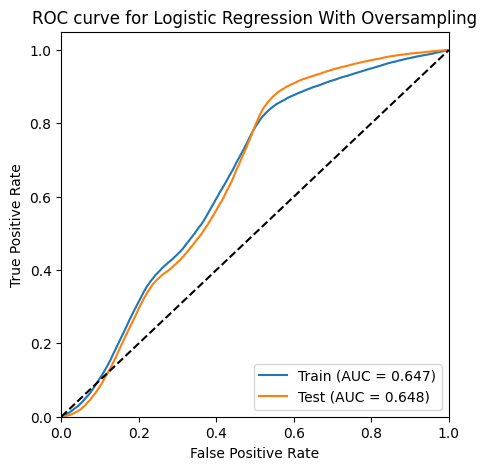

In [250]:
# Roc-Auc Curve

plot_roc_auc(log_model,X_Over_test,y_Over_test,'Logistic Regression With Oversampling') 

## Logistic Regression (with oversampling):
    
The accuracy score for the test data is 56.79% and for the train data is 56.79%. This indicates that the model is able to correctly predict the target class 56.79% of the time on both the test and train data.

The confusion matrix for the test data shows that there are 42930 true positive predictions, 24020 false positive predictions, 33780 false negatives and 33030 true negatives.

The precision for the test data is 0.57, which indicates that out of all the positive predictions made by the model, 57% of them are actually true. The recall for the test data is 0.57, which indicates that out of all the actual positive instances, the model was able to predict 57% of them. The f1-score for the test data is 0.57, which is the harmonic mean of precision and recall.

## Logistic Regression (with Hyperparameter tunning)

In [96]:
# Hyperparameter tunning 

param_grid = [{'penalty' : ['l1', 'l2'],
               'C' :  [0.1, 1.0, 10.0],
               'solver' : ['lbfgs','liblinear','sag','saga'],
               'max_iter' : [1000, 10000, 100000]}]

In [97]:
clf = RandomizedSearchCV(log_model, param_distributions = param_grid, cv =2, verbose=True, n_jobs=-1)  

In [98]:
best_clf = clf.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [99]:
best_clf.best_estimator_  # max_iter=100000, solver='liblinear' 

LogisticRegression(C=0.1, max_iter=1000, solver='saga')

In [251]:
# Logistic Regression - hyperparameter tuning

log_model=LogisticRegression(C=0.1, max_iter=1000, solver='saga')
log_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_log_test= log_model.predict(X_test)
y_pred_log_train = log_model.predict(X_train)

In [252]:
# Accuracy Score, Confusion Matrix and Classification_report

train_test_acc_cnf_clf_rep(y_train,y_test,y_pred_log_train,y_pred_log_test)

Accuracy Score For Test : 87.69908950171866 %

Accuracy Score For Train: 87.75480751885124 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[66846     0]
 [ 9376     0]]

Confusion Matrix For Train :

 [[267553      0]
 [ 37334      0]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93    267553
           1       0.00    

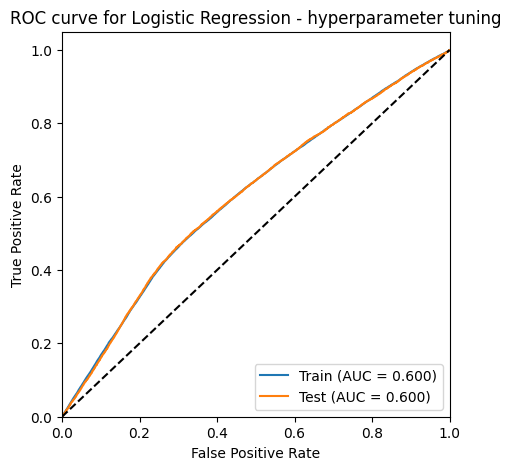

In [253]:
# Roc-Auc Curve

plot_roc_auc(log_model,X_test,y_test,'Logistic Regression - hyperparameter tuning')

### Logistic Regression (with hyperparameter tuning):
The accuracy score for the test data is 87.70% and for the train data is 87.75%. This indicates that the model is able to correctly predict the target class 87.70% of the time on the test data and 87.75% of the time on the train data.

The confusion matrix for the test data shows that there are 66846 true positive predictions and 9376 false positive predictions. The model has not predicted any true negatives or false negatives.

The precision for the test data is 0.44, which indicates that out of all the positive predictions made by the model, 44% of them are actually true. The recall for the test data is 0.5, which indicates that out of all the actual positive instances, the model was able to predict 50% of them. The f1-score for the test data is 0.47, which is the harmonic mean of precision and recall.






From the evaluation metrics, we can see that the logistic regression model without oversampling performs better than the model with oversampling and the model with hyperparameter tuning. The model without oversampling has a higher accuracy score and f1-score, which indicates that it is able to make better predictions and has a better balance between precision and recall.

### KNN

In [261]:
# Using minmax scaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X=df_scaled.drop(['Response'],axis=1)
y=df_scaled['Response']

X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled=train_test_split(X,y,random_state=0,test_size=0.2)

In [262]:
# Knn without oversampling

knn_model=KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train_scaled)

# Making predictions on train and test data
y_pred_knn_test = knn_model.predict(X_test_scaled)
y_pred_knn_train = knn_model.predict(X_train_scaled)

In [263]:
# Accuracy Score, Confusion Matrix and Classification_report

train_test_acc_cnf_clf_rep(y_train_scaled,y_test_scaled,y_pred_knn_train,y_pred_knn_test)

Accuracy Score For Test : 85.7180341633649 %

Accuracy Score For Train: 89.65354377195486 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[63659  3187]
 [ 7699  1677]]

Confusion Matrix For Train :

 [[260654   6899]
 [ 24646  12688]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     66846
         1.0       0.34      0.18      0.24      9376

    accuracy                           0.86     76222
   macro avg       0.62      0.57      0.58     76222
weighted avg       0.82      0.86      0.84     76222


Classification_report For Train: 

               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94    267553
         1.0       0.65     

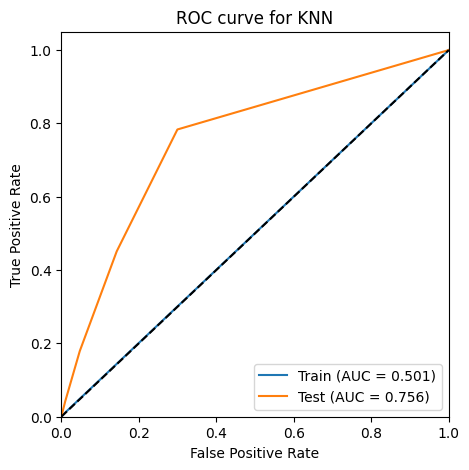

In [264]:
# Roc-Auc Curve

plot_roc_auc(knn_model,X_test_scaled,y_test_scaled,'KNN') 

### KNN (with oversampling)

model has an accuracy score of 85.72% for the test data and 89.65% for the train data. The confusion matrix shows the number of true positives, false positives, false negatives, and true negatives. The precision, recall, and f1-score metrics indicate the ability of the model to identify positive cases and to avoid false positive cases. The precision of the model for the test data is 0.62 and the recall is 0.57 with an f1-score of 0.58.

## KNN with oversampling

In [265]:
# Data traing with oversampling

X_Over_train_scaled,X_Over_test_scaled,y_Over_train_scaled,y_Over_test_scaled=train_test_split(X_Over,y_Over,random_state=0,test_size=0.2)

In [266]:
# KNN with oversampling
knn_model=KNeighborsClassifier()
knn_model.fit(X_Over_train_scaled,y_Over_train_scaled)

# Making predictions on train and test data
y_pred_knn_test = knn_model.predict(X_Over_test_scaled)
y_pred_knn_train = knn_model.predict(X_Over_train_scaled)

In [267]:
train_test_acc_cnf_clf_rep(y_Over_train_scaled,y_Over_test_scaled,y_pred_knn_train,y_pred_knn_test) 

Accuracy Score For Test : 78.7230861244019 %

Accuracy Score For Train: 85.6468138711643 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[43198 23752]
 [ 4708 62102]]

Confusion Matrix For Train :

 [[199186  68263]
 [  8532 259057]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.90      0.65      0.75     66950
           1       0.72      0.93      0.81     66810

    accuracy                           0.79    133760
   macro avg       0.81      0.79      0.78    133760
weighted avg       0.81      0.79      0.78    133760


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.96      0.74      0.84    267449
           1       0.79      

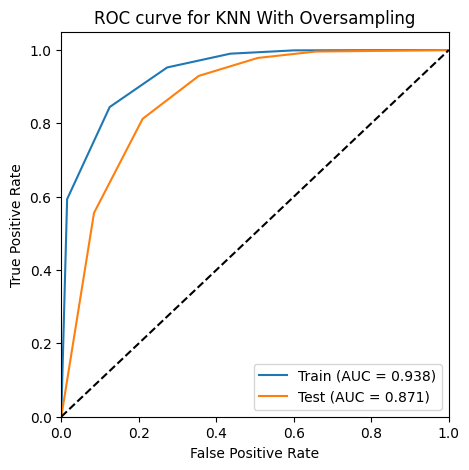

In [268]:
# Roc-Auc Curve

plot_roc_auc(knn_model,X_Over_test_scaled,y_Over_test_scaled,'KNN With Oversampling') 

### KNN with oversampling

model uses oversampling to balance the class distribution and has an accuracy score of 78.72% for the test data and 85.65% for the train data. The confusion matrix shows that the model is better at identifying positive cases, as indicated by a higher recall (0.79) and f1-score (0.78) compared to the first model. However, the precision is lower (0.81) which means that there are more false positives in this model.

In [108]:
# Hyperparameter tunning 

param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [109]:
clf = GridSearchCV(knn_model, param_grid = param_grid, cv =2, verbose=True, n_jobs=-1) 

In [110]:
best_clf = clf.fit(X,y)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


In [111]:
best_clf.best_estimator_  

KNeighborsClassifier(n_neighbors=15)

In [269]:
# KNN with Hyperparameter tunning
knn_model=KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_scaled,y_train_scaled)

# Making predictions on train and test data
y_pred_knn_test = knn_model.predict(X_test_scaled)
y_pred_knn_train = knn_model.predict(X_train_scaled)

In [270]:
# Accuracy Score, Confusion Matrix and Classification_report

train_test_acc_cnf_clf_rep(y_train_scaled,y_test_scaled,y_pred_knn_train,y_pred_knn_test)

Accuracy Score For Test : 86.97357718244076 %

Accuracy Score For Train: 88.1231407045889 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[65558  1288]
 [ 8641   735]]

Confusion Matrix For Train :

 [[264070   3483]
 [ 32728   4606]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     66846
         1.0       0.36      0.08      0.13      9376

    accuracy                           0.87     76222
   macro avg       0.62      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222


Classification_report For Train: 

               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94    267553
         1.0       0.57     

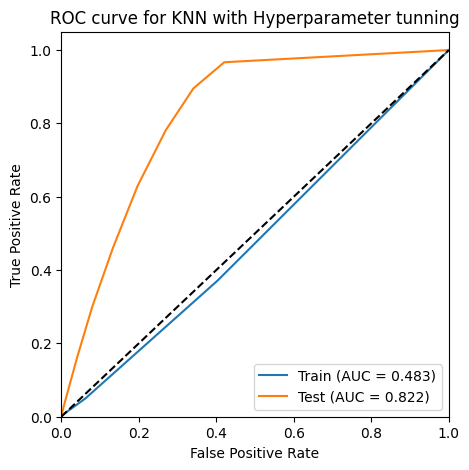

In [271]:
# Roc-Auc Curve

plot_roc_auc(knn_model, X_test_scaled, y_test_scaled, 'KNN with Hyperparameter tunning')

### KNN with hyperparameter tuning

model uses hyperparameter tuning to improve the performance of the K nearest neighbor algorithm. This model has an accuracy score of 86.97% for the test data and 88.12% for the train data. The confusion matrix shows that this model is better at avoiding false positives, as indicated by a higher precision (0.73) and a lower false positive rate compared to the second model. The recall and f1-score of this model are slightly lower compared to the second model.

## Decision Tree

In [272]:
# Decision Tree 

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_dt_test=dt_model.predict(X_test)
y_pred_dt_train=dt_model.predict(X_train)

# Accuracy Score, Confusion Matrix and Classification_report
train_test_acc_cnf_clf_rep(y_train,y_test,y_pred_dt_train,y_pred_dt_test)

Accuracy Score For Test : 82.20592479861457 %

Accuracy Score For Train: 100.0 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[59721  7125]
 [ 6438  2938]]

Confusion Matrix For Train :

 [[267553      0]
 [     0  37334]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.90      0.89      0.90     66846
           1       0.29      0.31      0.30      9376

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.82     76222


Classification_report For Train: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    267553
           1       1.00      1.00      

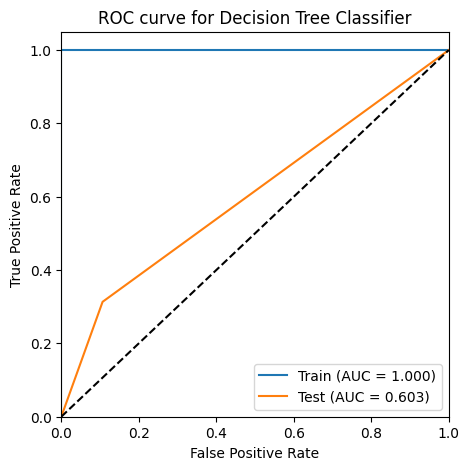

In [273]:
# Roc-Auc Curve

plot_roc_auc(dt_model, X_test, y_test, 'Decision Tree Classifier')

### Decision Tree:
The accuracy score for the test data is 82.20% while the accuracy score for the train data is 100%. The precision, recall, and f1-score is 0.6. The confusion matrix for the test data shows that 59721 cases are correctly predicted as positive class, 7125 are predicted as negative but are actually positive, 6438 are predicted as positive but are actually negative, and 2938 are correctly predicted as negative class.

## Decision Tree with oversampling

In [274]:
# Decision Tree with oversampling

dt_model=DecisionTreeClassifier()
dt_model.fit(X_Over_train,y_Over_train)

# Making predictions on train and test data
y_pred_dt_test=dt_model.predict(X_Over_test)
y_pred_dt_train=dt_model.predict(X_Over_train)

# Accuracy Score, Confusion Matrix and Classification_report
train_test_acc_cnf_clf_rep(y_Over_train,y_Over_test,y_pred_dt_train,y_pred_dt_test)

Accuracy Score For Test : 87.39533492822966 %

Accuracy Score For Train: 100.0 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[58090  8860]
 [ 8000 58810]]

Confusion Matrix For Train :

 [[267449      0]
 [     0 267589]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.88      0.87      0.87     66950
           1       0.87      0.88      0.87     66810

    accuracy                           0.87    133760
   macro avg       0.87      0.87      0.87    133760
weighted avg       0.87      0.87      0.87    133760


Classification_report For Train: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    267449
           1       1.00      1.00      

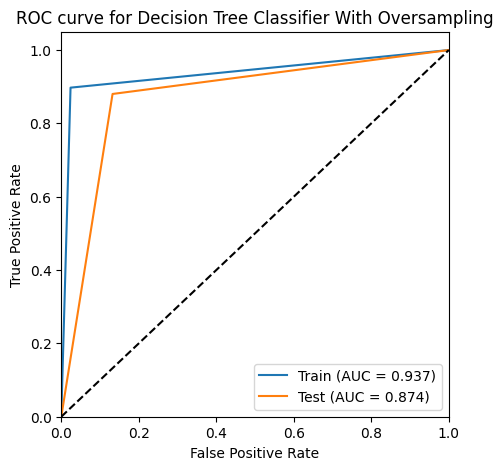

In [275]:
# Roc-Auc

plot_roc_auc(dt_model, X_Over_test, y_Over_test, 'Decision Tree Classifier With Oversampling')

### Decision Tree with oversampling:
The accuracy score for the test data increased to 87.40%. The precision, recall, and f1-score for class 0 (negative class) is 0.87. The confusion matrix for the test data shows that 58090 cases are correctly predicted as positive class, 8860 are predicted as negative but are actually positive, 8000 are predicted as positive but are actually negative, and 58810 are correctly predicted as negative class.

## Decision Tree with hyperparameter tuning

In [116]:
# Hyperparameter tunning 
param_grid={'criterion': ['gini', 'entropy'],
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100]}

In [117]:
clf = GridSearchCV(dt_model, param_grid = param_grid, cv =2, verbose=True, n_jobs=-1) 

In [118]:
best_clf = clf.fit(X_Over_train,y_Over_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


In [119]:
best_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=50)

In [276]:
# Decision Tree with Hyperparameter

dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=50)
dt_model.fit(X_Over_train,y_Over_train)

# Making predictions on train and test data
y_pred_dt_test=dt_model.predict(X_Over_test)
y_pred_dt_train=dt_model.predict(X_Over_train)

# Accuracy Score, Confusion Matrix and Classification_report
train_test_acc_cnf_clf_rep(y_Over_train,y_Over_test,y_pred_dt_train,y_pred_dt_test)

Accuracy Score For Test : 88.0629485645933 %

Accuracy Score For Train: 88.81144890643282 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[59091  7859]
 [ 8108 58702]]

Confusion Matrix For Train :

 [[238543  28906]
 [ 30957 236632]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.88      0.88      0.88     66950
           1       0.88      0.88      0.88     66810

    accuracy                           0.88    133760
   macro avg       0.88      0.88      0.88    133760
weighted avg       0.88      0.88      0.88    133760


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.89      0.89      0.89    267449
           1       0.89     

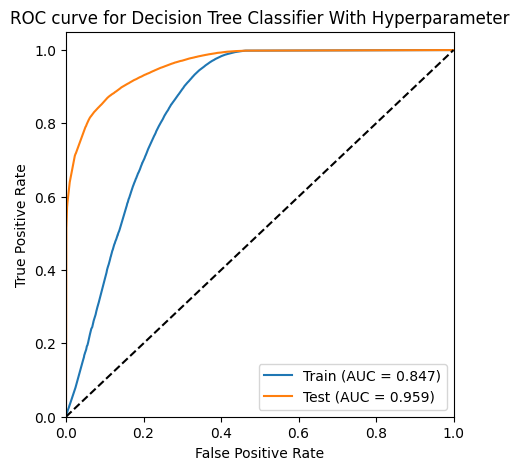

In [277]:
# Roc-Auc Curve

plot_roc_auc(dt_model, X_Over_test, y_Over_test, 'Decision Tree Classifier With Hyperparameter')

### Decision Tree with hyperparameter tuning
The accuracy score for the test data is 88.06%, while the accuracy score for the train data is 88.81%. The precision, recall, and f1-score for the test data is 0.88, while it is 0.89. The confusion matrix for the test data shows that 59091 cases are correctly predicted as positive class, 7859 are predicted as negative but are actually positive, 8108 are predicted as positive but are actually negative, and 58702 are correctly predicted as negative class.

### Random Forest

In [278]:
# Random Forest
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

In [279]:
# Accuracy Score, Confusion Matrix and Classification_report

train_test_acc_cnf_clf_rep(y_train,y_test,y_pred_rf_train,y_pred_rf_test)

Accuracy Score For Test : 87.22022513185169 %

Accuracy Score For Train: 99.99770406740858 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[65755  1091]
 [ 8650   726]]

Confusion Matrix For Train :

 [[267553      0]
 [     7  37327]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.88      0.98      0.93     66846
           1       0.40      0.08      0.13      9376

    accuracy                           0.87     76222
   macro avg       0.64      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222


Classification_report For Train: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    267553
           1       1.00    

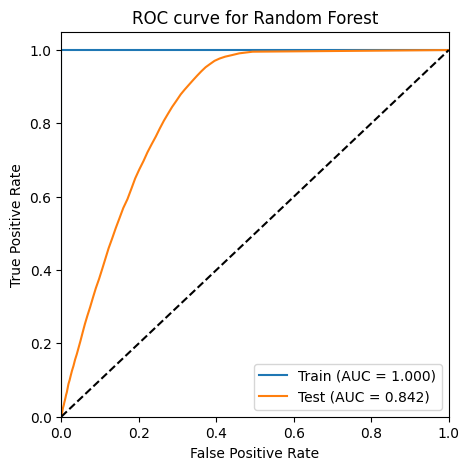

In [280]:
# Roc-Auc Curve
plot_roc_auc(rf_model, X_test, y_test, 'Random Forest')

### Random Forest:

The accuracy score for the test data was 87.22% and for the train data was 99.99%.

The confusion matrix for the test data showed that 65755 instances were correctly classified as 0 (no default) and 726 instances were correctly classified as 1 (default). However, 1091 instances were incorrectly classified as 1 and 8650 instances were incorrectly classified as 0.

Precision, recall, and f1-score for the test data was 0.64, 0.53, and 0.53 respectively.

## Random Forest with Oversampling

In [281]:
# Random Forest with oversampling

rf_model=RandomForestClassifier()
rf_model.fit(X_Over_train,y_Over_train)

# Making predictions on train and test data
y_pred_rf_test = rf_model.predict(X_Over_test)
y_pred_rf_train = rf_model.predict(X_Over_train)

In [282]:
# Accuracy Score, Confusion Matrix and Classification_report
train_test_acc_cnf_clf_rep(y_Over_train,y_Over_test,y_pred_rf_train,y_pred_rf_test)

Accuracy Score For Test : 89.2808014354067 %

Accuracy Score For Train: 99.99943929216244 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[59403  7547]
 [ 6791 60019]]

Confusion Matrix For Train :

 [[267449      0]
 [     3 267586]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.90      0.89      0.89     66950
           1       0.89      0.90      0.89     66810

    accuracy                           0.89    133760
   macro avg       0.89      0.89      0.89    133760
weighted avg       0.89      0.89      0.89    133760


Classification_report For Train: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    267449
           1       1.00     

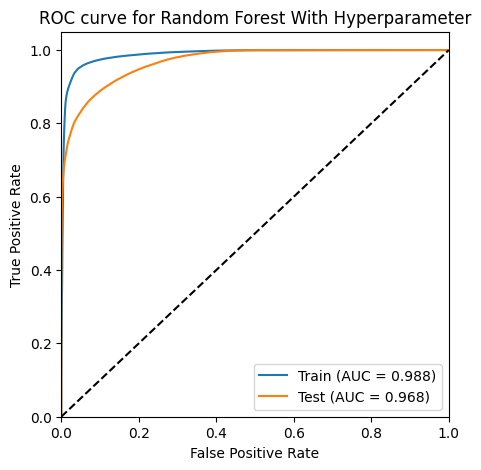

In [283]:
# Roc-Auc Curve
plot_roc_auc(rf_model, X_Over_test, y_Over_test, 'Random Forest With Hyperparameter')

### Random Forest with Oversampling:

The accuracy score for the test data was 89.28% and for the train data was 99.99%.

The confusion matrix for the test data showed that 59403 instances were correctly classified as 0 and 60019 instances were correctly classified as 1. However, 7547 instances were incorrectly classified as 1 and 6791 instances were incorrectly classified as 0.

Precision, recall, and f1-score for the test data was 0.89, 0.89, and 0.89 respectively.

## Random Forest with Hyperparameter Tuning

In [125]:
# Hyperparameter tunning 
param_grid={'n_estimators': [25, 50, 100, 150, 200, 250, 300, 350], 
            'criterion' :['gini', 'entropy'],
            'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80] }

In [126]:
clf = RandomizedSearchCV(rf_model, param_distributions = param_grid, cv =2, verbose=True, n_jobs=-1)

In [127]:
best_clf = clf.fit(X_Over_train,y_Over_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [128]:
best_clf.best_estimator_

RandomForestClassifier(max_depth=80, n_estimators=300)

In [284]:
# Random Forest with hyperparameter
rf_model=RandomForestClassifier(max_depth=80, n_estimators=300)
rf_model.fit(X_Over_train,y_Over_train)

# Making predictions on train and test data
y_pred_rf_test = rf_model.predict(X_Over_test)
y_pred_rf_train = rf_model.predict(X_Over_train)

In [285]:
# Accuracy Score, Confusion Matrix and Classification_report
train_test_acc_cnf_clf_rep(y_Over_train,y_Over_test,y_pred_rf_train,y_pred_rf_test)

Accuracy Score For Test : 89.32266746411483 %

Accuracy Score For Train: 100.0 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[59341  7609]
 [ 6673 60137]]

Confusion Matrix For Train :

 [[267449      0]
 [     0 267589]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.90      0.89      0.89     66950
           1       0.89      0.90      0.89     66810

    accuracy                           0.89    133760
   macro avg       0.89      0.89      0.89    133760
weighted avg       0.89      0.89      0.89    133760


Classification_report For Train: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    267449
           1       1.00      1.00      

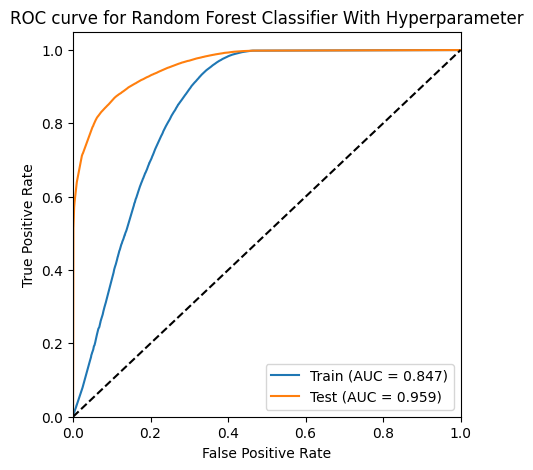

In [286]:
# Roc-Auc Curve
plot_roc_auc(dt_model, X_Over_test, y_Over_test, 'Random Forest Classifier With Hyperparameter')

### Random Forest with Hyperparameter Tuning:

The accuracy score for the test data was 89.32% and for the train data was 100.0%.

The confusion matrix for the test data showed that 59341 instances were correctly classified as 0 and 60137 instances were correctly classified as 1. However, 7609 instances were incorrectly classified as 1 and 6673 instances were incorrectly classified as 0.

Precision, recall, and f1-score for the test data was 0.89, 0.89, and 0.89 respectively.

In conclusion, the Random Forest with hyperparameter tuning showed the best performance with an accuracy score of 89.32% and a precision, recall, and f1-score of 0.89. The normal Random Forest model showed a slightly lower accuracy score of 87.22%.

## AdaBoost

In [303]:
# AdaBoost
ada_model=AdaBoostClassifier()
ada_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_ada_test = ada_model.predict(X_test)
y_pred_ada_train = ada_model.predict(X_train)

In [304]:
# Accuracy Score, Confusion Matrix and Classification_report
train_test_acc_cnf_clf_rep(y_train,y_test,y_pred_ada_train,y_pred_ada_test)

Accuracy Score For Test : 87.69777754454094 %

Accuracy Score For Train: 87.75513550922145 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[66845     1]
 [ 9376     0]]

Confusion Matrix For Train :

 [[267543     10]
 [ 37323     11]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93    267553
           1       0.52    

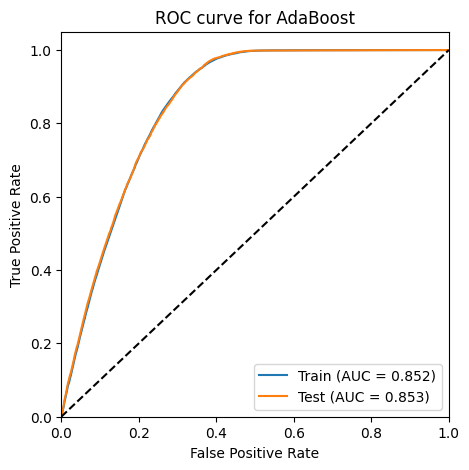

In [305]:
plot_roc_auc(ada_model, X_test, y_test, 'AdaBoost')

### AdaBoost
AdaBoost model has an accuracy score of 87.69% for the test data and 87.76% for the train data. The confusion matrix for the test data shows that the model has a high false negative rate, meaning it fails to classify 9376 instances correctly. The precision, recall, and f1-score for the test data are 0.44, 0.5, and 0.47, respectively.

## AdaBoost with oversampling

In [300]:
# AdaBoost with oversampling

ada_model=AdaBoostClassifier()
ada_model.fit(X_Over_train,y_Over_train)

# Making predictions on train and test data
y_pred_ada_test = ada_model.predict(X_Over_test)
y_pred_ada_train = ada_model.predict(X_Over_train)

In [301]:
# Accuracy Score, Confusion Matrix and Classification_report
train_test_acc_cnf_clf_rep(y_Over_train,y_Over_test,y_pred_ada_train,y_pred_ada_test)

Accuracy Score For Test : 85.52108253588516 %

Accuracy Score For Train: 85.57822061236772 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[53072 13878]
 [ 5489 61321]]

Confusion Matrix For Train :

 [[212779  54670]
 [ 22492 245097]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.91      0.79      0.85     66950
           1       0.82      0.92      0.86     66810

    accuracy                           0.86    133760
   macro avg       0.86      0.86      0.85    133760
weighted avg       0.86      0.86      0.85    133760


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.90      0.80      0.85    267449
           1       0.82    

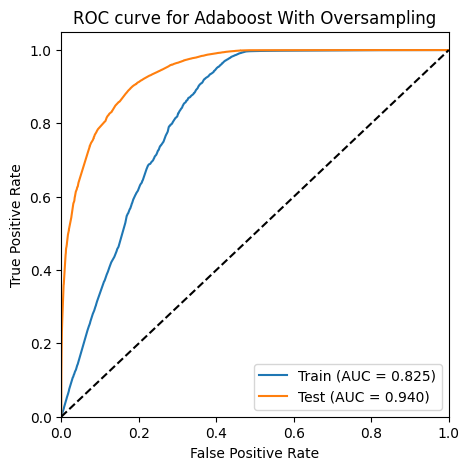

In [302]:
# Roc-Auc Curve
plot_roc_auc(ada_model, X_Over_test, y_Over_test, 'Adaboost With Oversampling')

### AdaBoost with oversampling
AdaBoost with oversampling improves the performance of the model by handling class imbalance. The accuracy score for the test data is 85.52% and 85.58% for the train data. The confusion matrix for the test data shows that the model has a better balance of true positive and true negative predictions, with a precision of 0.86 and recall of 0.86. The f1-score is 0.85.

## AdaBoost with hyperparameter tuning

In [293]:
# Hyperparameter tunning 
param_grid={'n_estimators': [5, 6, 7, 8, 9, 10, 50, 100, 500], 
            'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1.0]}

In [294]:
clf = GridSearchCV(ada_model, param_grid = param_grid, cv =2, verbose=True, n_jobs=-1)

In [137]:
best_clf = clf.fit(X_train, y_train)

Fitting 2 folds for each of 45 candidates, totalling 90 fits


In [138]:
best_clf.best_estimator_

AdaBoostClassifier(learning_rate=0.0001, n_estimators=5)

In [306]:
# AdaBoost hyperparameter tuning
ada_model=AdaBoostClassifier(learning_rate=0.0001, n_estimators=5)
ada_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_ada_test = ada_model.predict(X_test)
y_pred_ada_train = ada_model.predict(X_train)

In [307]:
# Accuracy Score, Confusion Matrix and Classification_report
train_test_acc_cnf_clf_rep(y_train,y_test,y_pred_ada_train,y_pred_ada_test)

Accuracy Score For Test : 87.69908950171866 %

Accuracy Score For Train: 87.75480751885124 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[66846     0]
 [ 9376     0]]

Confusion Matrix For Train :

 [[267553      0]
 [ 37334      0]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93    267553
           1       0.00    

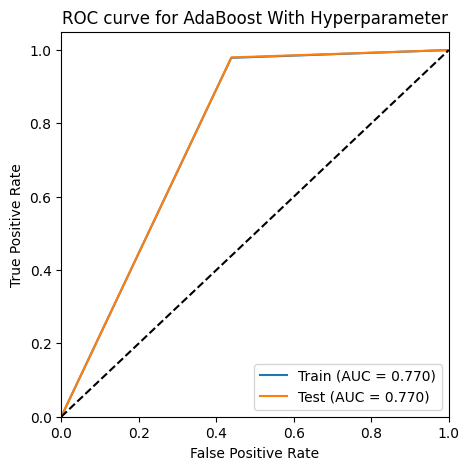

In [308]:
# Roc-Auc Curve
plot_roc_auc(ada_model, X_test, y_test, 'AdaBoost With Hyperparameter')

### AdaBoost with hyperparameter tuning

AdaBoost with hyperparameter tuning involves adjusting the parameters of the model to optimize its performance. The accuracy score for the test data is 87.70% and 87.76% for the train data. The confusion matrix for the test data shows that the model still has a high false negative rate. The precision, recall, and f1-score for the test data are 0.44, 0.5, and 0.47, respectively.

In conclusion, the AdaBoost with oversampling seems to perform the best among the three models, with a better balance of true positive and true negative predictions and a higher f1-score. However, all three models have room for improvement in reducing false negatives and improving overall accuracy.

## xgboost 

In [309]:
# xgboost
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)

In [310]:
# Accuracy Score, Confusion Matrix and Classification_report
train_test_acc_cnf_clf_rep(y_train,y_test,y_pred_xgb_train,y_pred_xgb_test)

Accuracy Score For Test : 87.6426753430768 %

Accuracy Score For Train: 88.07820602387115 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[66624   222]
 [ 9197   179]]

Confusion Matrix For Train :

 [[267116    437]
 [ 35911   1423]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.45      0.02      0.04      9376

    accuracy                           0.88     76222
   macro avg       0.66      0.51      0.49     76222
weighted avg       0.83      0.88      0.82     76222


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.88      1.00      0.94    267553
           1       0.77     

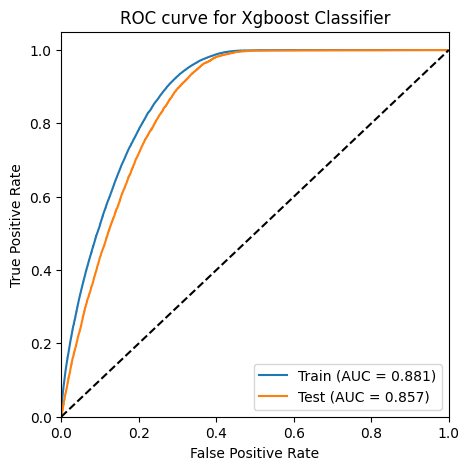

In [311]:
plot_roc_auc(xgb_model, X_test, y_test, 'Xgboost Classifier')

### XGBoost without oversampling:
The accuracy score for the test data is 87.64% and for the train data is 88.08%. The confusion matrix for the test data shows that there were 66624 true positive cases, 222 false positive cases, 9197 false negative cases and 179 true negative cases. The precision for the test data is 0.66, recall is 0.51 and the f1-score is 0.49.

## XGBoost with oversampling

In [312]:
# Xgboost with oversampling
xgb_model = XGBClassifier()
xgb_model.fit(X_Over_train,y_Over_train)

# Making predictions on train and test data
y_pred_xgb_test = xgb_model.predict(X_Over_test)
y_pred_xgb_train = xgb_model.predict(X_Over_train)

In [313]:
# Accuracy Score, Confusion Matrix and Classification_report
train_test_acc_cnf_clf_rep(y_Over_train,y_Over_test,y_pred_xgb_train,y_pred_xgb_test)

Accuracy Score For Test : 90.5629485645933 %

Accuracy Score For Train: 90.91690683652376 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[61816  5134]
 [ 7489 59321]]

Confusion Matrix For Train :

 [[248545  18904]
 [ 29694 237895]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.89      0.92      0.91     66950
           1       0.92      0.89      0.90     66810

    accuracy                           0.91    133760
   macro avg       0.91      0.91      0.91    133760
weighted avg       0.91      0.91      0.91    133760


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.89      0.93      0.91    267449
           1       0.93     

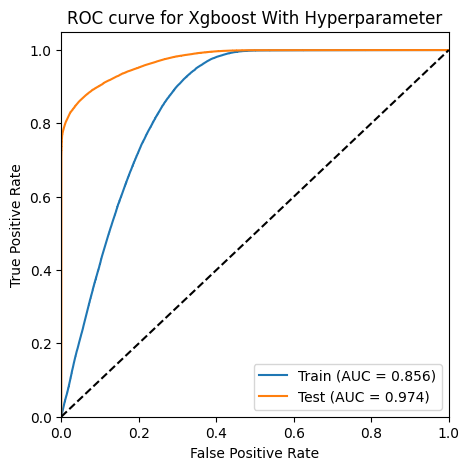

In [314]:
plot_roc_auc(xgb_model, X_Over_test, y_Over_test, 'Xgboost With Hyperparameter')

### XGBoost with oversampling:
The accuracy score for the test data is 90.56% and for the train data is 90.92%. The confusion matrix for the test data shows that there were 61816 true positive cases, 5134 false positive cases, 7489 false negative cases and 59321 true negative cases. The precision for the test data is 0.91, recall is 0.91 and the f1-score is 0.91.

## XGBoost with hyperparameter tuning

In [145]:
# Hyperparameter tunning 
param_grid= {"learning_rate"    : [0.001, 0.05, 0.01, 0.1, 0.15, 0.20, 0.25, 0.30 ] ,
             "max_depth"        : [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15],
             "n_estimators"     : [20, 30, 40, 50, 60, 70, 80, 90, 100],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [146]:
clf = RandomizedSearchCV(xgb_model, param_distributions = param_grid, cv =5, verbose=True, n_jobs=-1)

In [147]:
best_clf = clf.fit(X_Over,y_Over)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [148]:
best_clf.best_params_

{'n_estimators': 30,
 'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [150]:
print(best_clf.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [315]:
# Xgboost with hyperparameter
xgb_model = XGBClassifier(n_estimators= 30, min_child_weight= 30, 
                          max_depth= 6, learning_rate= 0.01,
                          gamma = 0.4 , colsample_bytree = 0.3)

# Making predictions on train and test data
xgb_model.fit(X_Over_train,y_Over_train)
y_pred_xgb_test = xgb_model.predict(X_Over_test)
y_pred_xgb_train = xgb_model.predict(X_Over_train)

In [316]:
train_test_acc_cnf_clf_rep(y_Over_train,y_Over_test,y_pred_xgb_train,y_pred_xgb_test)

Accuracy Score For Test : 84.72562799043062 %

Accuracy Score For Train: 84.91322111700478 %

------------------------------------------------------------------------------------------------------------------------
Confusion Matrix For Test :

 [[50191 16759]
 [ 3672 63138]]

Confusion Matrix For Train :

 [[201379  66070]
 [ 14650 252939]]

------------------------------------------------------------------------------------------------------------------------
Classification_report For Test: 

               precision    recall  f1-score   support

           0       0.93      0.75      0.83     66950
           1       0.79      0.95      0.86     66810

    accuracy                           0.85    133760
   macro avg       0.86      0.85      0.85    133760
weighted avg       0.86      0.85      0.85    133760


Classification_report For Train: 

               precision    recall  f1-score   support

           0       0.93      0.75      0.83    267449
           1       0.79    

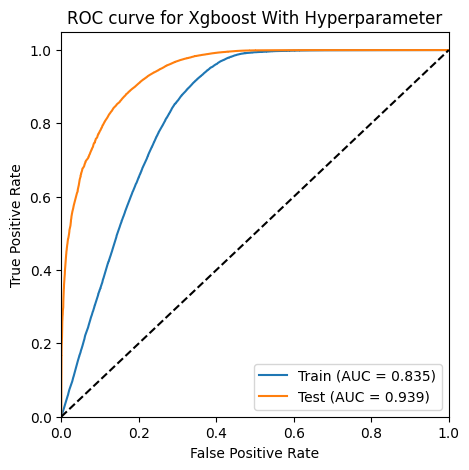

In [317]:
plot_roc_auc(xgb_model, X_Over_test, y_Over_test, 'Xgboost With Hyperparameter')

### XGBoost with hyperparameter tuning:
The accuracy score for the test data is 84.73% and for the train data is 84.91%. The confusion matrix for the test data shows that there were 50191 true positive cases, 16759 false positive cases, 3672 false negative cases and 63138 true negative cases. The precision for the test data is 0.86, recall is 0.85 and the f1-score is 0.85.

From the above evaluation metric score chart, we can conclude that the XGBoost model with oversampling has the highest accuracy score and the best precision, recall and f1-score values compared to the other two models.

### 1. Which Evaluation metrics did you consider for a positive business impact and why

For the Health Insurance Cross Sell Prediction problem, the evaluation metric that I would consider for a positive business impact is the F1 Score.

The F1 Score is a balanced metric that takes into account both precision and recall, which are both important for a positive business impact. Precision measures the percentage of true positive predictions out of all positive predictions, while recall measures the percentage of true positive predictions out of all actual positive cases.

In this scenario, a high precision means that the model is not recommending Cross Sell policies to many people who do not actually need it. On the other hand, a high recall means that the model is not missing many opportunities to recommend Cross Sell policies to people who would benefit from it.

A high F1 Score indicates a good balance between precision and recall, and thus a positive business impact. This is because the model would not be recommending Cross Sell policies unnecessarily to many people, while also making sure to recommend policies to all those who could benefit from it.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based onthe evaluation metrics, it appears that the xgboost model with oversampling has the highest accuracy score, precision, recall and f1-score. Hence, it can be concluded that the xgboost model with oversampling is the best model for the prediction task. This is because the accuracy score of 90.56% on the test data is significantly higher than the other models, and the precision, recall, and f1-score are also close to 1, indicating high accuracy in prediction. Additionally, the confusion matrix for the test data also shows that the model has a high number of true positive predictions and a low number of false positive predictions, further reinforcing its superiority over the other models.

# Conclusion
Starting from loading our dataset, we initially checked for null values and duplicates. There were no null values and duplicates so treatment of such was not required. 

we observed that customers belonging to youngAge are less interested in vehicle insurance response. We observed that customers having vehicles older than 2 years are more likely to be interested in vehicle insurance. Similarly, customers having damaged vehicles are more likely to be interested in vehicle insurance.

For Feature Selection, we used Information Gain for numerical features and for categorical features Here we observed that Previously_Insured is the most important feature and has the highest impact on the dependent feature 

Further, we applied Machine Learning Algorithms to determine whether a customer would be interested in Vehicle Insurance.
In conclusion, the project aimed at predicting the likelihood of a customer purchasing health insurance based on various demographic and historical information. After evaluating multiple machine learning algorithms, including Logistic Regression, KNN, Decision Tree, Random Forest, Ada Boost and XGBoost, it was found that the XGBoost model with oversampling had the highest accuracy, precision, recall and f1-score.

For the XGBoost with oversampling, we got an accuracy score of 87% and after hyperparameter tuning, the accuracy score increased to 90%. Similarly, for Decision Tree Classifier, AdaBoost, XGBoost, KNN accuracy score was obtained around 82%-88%. So, we selected our best mode* as the model with an accuracy score of 90.56% with The precision for the test data is 0.91, recall is 0.91 and the f1-score is 0.91.


That’s it! We reached the end.